# Job Posting Data Analysis
In this notebook, the group will be working with the [Job Posting in Singapore](https://www.kaggle.com/datasets/techsalerator/job-posting-data-in-singapore) dataset. This dataset will be used for processing, analyzing, and visualizing data.

This project is carried out by the group **DS NERDS**, under Section **S19**, which consists of the following members:
- Colobong, Franz Andrick
- Chu, Andre Benedict M. 
- Pineda, Mark Gabriel A.
- Rocha, Angelo H. 
  
The output fulfills a part of the requirements for the course Statistical Modeling and Simulation (CSMODEL). 


# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
import json

**Modules Used:**

- `pandas`: Used for loading, manipulating, and analyzing tabular data.
- `numpy`: Provides numerical operations and support for handling arrays and missing values.
- `matplotlib.pyplot`: Used for creating basic plots and visualizations to explore data.
- `seaborn`: Builds on matplotlib to create more informative and visually appealing statistical graphics.
- `scipy` and `scipy.stats`: Used for performing statistical tests and calculations.
- `chi2_contingency` (from `scipy.stats`): Specifically used to perform the Chi-Square test of independence between categorical variables.
- `json`: Used for reading or handling data in JSON format, if applicable.


## Dataset Description and Collection Process

This dataset offers a comprehensive overview of job openings across various sectors in Singapore. It provides an essential resource for businesses, job seekers, and labor market analysts, and it can also be a valuable tool for people who would like to be informed about job openings and employment trends in Singapore.

The data was collected by a global data provider called **Techsalerator**, by consolidating and categorizing job-related information from diverse sources, including company websites, job boards, and recruitment agencies. 

Now, let us load the CSV file into our workspace with **'latin1'** encoding as it contains special characters (e.g., é, ñ, ’) that caused a UnicodeDecodeError with the default **'utf-8'** encoding.

In [2]:
job_posting_df = pd.read_csv('Job Posting.csv', encoding='latin1')
job_posting_df.head(5)

,Website Domain,Ticker,Job Opening Title,Job Opening URL,First Seen At,Last Seen At,Location,Location Data,Category,Seniority,...,Description,Salary,Salary Data,Contract Types,Job Status,Job Language,Job Last Processed At,O*NET Code,O*NET Family,O*NET Occupation Name
0,bosch.com,NaN,IN_RBAI_Assistant Manager_Dispensing Process E...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-05-29T19:59:45Z,2024-07-31T14:35:44Z,"Indiana, United States","[{""city"":null,""state"":""Indiana"",""zip_code"":nul...","engineering, management, support",manager,...,**IN\_RBAI\_Assistant Manager\_Dispensing Proc...,NaN,"{""salary_low"":null,""salary_high"":null,""salary_...",full time,closed,en,2024-08-02T14:47:55Z,43-1011.00,Office and Administrative Support,First-Line Supervisors of Office and Administr...
1,bosch.com,NaN,Professional Internship: Hardware Development ...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-05-04T01:00:12Z,2024-07-29T17:46:16Z,"Delaware, United States","[{""city"":null,""state"":""Delaware"",""zip_code"":nu...",internship,non_manager,...,**Professional Internship: Hardware Developmen...,NaN,"{""salary_low"":null,""salary_high"":null,""salary_...","full time, internship, m/f",closed,en,2024-07-31T17:50:07Z,17-2061.00,Architecture and Engineering,Computer Hardware Engineers
2,zf.com,NaN,Process Expert BMS Production,https://jobs.zf.com/job/Shenyang-Process-Exper...,2024-04-19T06:47:24Z,2024-05-16T02:25:08Z,China,"[{""city"":null,""state"":null,""zip_code"":null,""co...",engineering,non_manager,...,ZF is a global technology company supplying sy...,NaN,"{""salary_low"":null,""salary_high"":null,""salary_...",NaN,closed,en,2024-05-18T02:32:04Z,51-9141.00,Production,Semiconductor Processing Technicians
3,bosch.com,NaN,DevOps Developer with Python for ADAS Computin...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-08-16T10:20:37Z,2024-08-22T11:14:49Z,Romania,"[{""city"":null,""state"":null,""zip_code"":null,""co...","information_technology, software_development",non_manager,...,**DevOps Developer with Python for ADAS Comput...,NaN,"{""salary_low"":null,""salary_high"":null,""salary_...",full time,closed,en,2024-08-23T00:33:30Z,15-1252.00,Computer and Mathematical,Software Developers
4,bosch.com,NaN,Senior Engineer Sales - Video Systems and Solu...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-07-01T17:31:20Z,2024-08-01T05:11:33Z,India,"[{""city"":null,""state"":null,""zip_code"":null,""co...","engineering, sales",non_manager,...,**Senior Engineer Sales - Video Systems and So...,NaN,"{""salary_low"":null,""salary_high"":null,""salary_...",full time,closed,en,2024-08-02T19:03:16Z,41-9031.00,Sales and Related,Sales Engineers


## Structure of the Data
In the dataset, there are 9919 rows and 21 columns. The rows reprent the total number of job postings entries, while the columns represent the attributes/variables gathered from these entries. The total number of observations is 9919 entries. These observations include the following: Website Domain, Ticker, Job Opening Title, Job Opening URL, First Seen At, Last Seen At, Location, Location Data, Category, Seniority, Keywords, Description, Salary, Salary Data, Contract Types, Job Status, Job Language, Job Last Processed At, O*NET Code, O*NET Family, O*NET Occupation Name.


In [3]:
job_posting_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9919 entries, 0 to 9918
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Website Domain         9919 non-null   object 
 1   Ticker                 0 non-null      float64
 2   Job Opening Title      9919 non-null   object 
 3   Job Opening URL        9919 non-null   object 
 4   First Seen At          9919 non-null   object 
 5   Last Seen At           9919 non-null   object 
 6   Location               9508 non-null   object 
 7   Location Data          9919 non-null   object 
 8   Category               8250 non-null   object 
 9   Seniority              9919 non-null   object 
 10  Keywords               7646 non-null   object 
 11  Description            9807 non-null   object 
 12  Salary                 576 non-null    object 
 13  Salary Data            9919 non-null   object 
 14  Contract Types         8004 non-null   object 
 15  Job 

## Potential Implications of the Data
There are sevaral implications that can be gathered from this dataset. First and foremost, since the impact of AI has been more evident in the recent 5 years, analyzing the contents of this dataset can help us analyze what companies are currently looking for, especially when they are outsourcing to different countries. It helps us answer questions such as: 
- "Have companies started to hire less?" 
- "Are there more specialized skills being targeted" 
- "Are the more or less opportunities in different job fields?"
 
Second, this dataset will provide insights on key patterns and trends on the job market. It helps us identify what is happening in the various job fields as of 2024.
- "Is there a current downtrend or uptrend in regards with the job openings for specific industries?"
- "What are the possible forecastings we can achieve through these data?"
- "Are there enough entry-level positions opened? Are salaries enough for livable standareds"

The last and third point, is that job seekers can utilize the results of this analysis in understanding the current landscape of job industry. 
- "What are the current job fields that are opening more opportunities?"
- "What are the required skills for this type of job that a person wants?"
- "What do they need in order to get a livable or luxury type of wage?"

Of course, these questions are just examples of what the group is hoping to answer at the end of this notebook, there are many more questions that are still unexplored yet can provide impactful insights. 


## Key Data Fields 

This section provides a brief description of the key attributes present in the dataset:


- **Job Posting Date**: Captures the date a job is listed. This is crucial for job seekers and HR professionals to stay updated on the latest opportunities and trends.

- **Job Title**: Specifies the position being advertised. This helps in categorizing and filtering job openings based on industry roles and career interests.

- **Company Name**: Lists the hiring company. This information assists job seekers in targeting their applications and helps businesses track competitors and market trends.

- **Job Location**: Provides the job's geographic location within Singapore. Job seekers use this to find opportunities in specific areas, while employers analyze regional talent and market conditions.

- **Job Description**: Includes details about responsibilities, required qualifications, and other relevant aspects. This is vital for candidates to determine if they meet the requirements and for recruiters to communicate expectations clearly.

- **Contract Type**: Indicates the nature of employment (e.g., full-time, part-time, internship, contract). This helps applicants filter jobs based on their preferred working arrangement and helps analysts understand hiring trends.

- **O\*NET Family**: A standardized occupational classification that groups jobs into career fields. It enables high-level analysis across job domains and supports career exploration and workforce planning.

- **Salary Data**: Provides detailed information regarding the salary offered for the job. This allows individuals to understand earning potential, compare salaries across job roles or fields, and make more informed career or hiring decisions.



In [4]:
key_data_fields = job_posting_df[['First Seen At', 'Job Opening Title', 'Job Opening URL', 'Location', 'Description', 'Contract Types', 'O*NET Family', 'Salary Data']]
key_data_fields.head()

,First Seen At,Job Opening Title,Job Opening URL,Location,Description,Contract Types,O*NET Family,Salary Data
0,2024-05-29T19:59:45Z,IN_RBAI_Assistant Manager_Dispensing Process E...,https://jobs.smartrecruiters.com/BoschGroup/74...,"Indiana, United States",**IN\_RBAI\_Assistant Manager\_Dispensing Proc...,full time,Office and Administrative Support,"{""salary_low"":null,""salary_high"":null,""salary_..."
1,2024-05-04T01:00:12Z,Professional Internship: Hardware Development ...,https://jobs.smartrecruiters.com/BoschGroup/74...,"Delaware, United States",**Professional Internship: Hardware Developmen...,"full time, internship, m/f",Architecture and Engineering,"{""salary_low"":null,""salary_high"":null,""salary_..."
2,2024-04-19T06:47:24Z,Process Expert BMS Production,https://jobs.zf.com/job/Shenyang-Process-Exper...,China,ZF is a global technology company supplying sy...,NaN,Production,"{""salary_low"":null,""salary_high"":null,""salary_..."
3,2024-08-16T10:20:37Z,DevOps Developer with Python for ADAS Computin...,https://jobs.smartrecruiters.com/BoschGroup/74...,Romania,**DevOps Developer with Python for ADAS Comput...,full time,Computer and Mathematical,"{""salary_low"":null,""salary_high"":null,""salary_..."
4,2024-07-01T17:31:20Z,Senior Engineer Sales - Video Systems and Solu...,https://jobs.smartrecruiters.com/BoschGroup/74...,India,**Senior Engineer Sales - Video Systems and So...,full time,Sales and Related,"{""salary_low"":null,""salary_high"":null,""salary_..."


## Data Pre-Processing

Before diving into analysis, it's essential to **clean and standardize** the dataset to ensure accurate insights. In this section, we focus on preparing the data by addressing duplicates, handling missing values, correcting data types, and other data pre-processing techniques to improve data quality and ensure consistency throughout the analysis.

These steps help improve the **quality, reliability, and interpretability** of our exploratory data analysis (EDA) results.


### Remove Unnecessary Columns
Upon inspection, we can see that the **`Ticker`** column—referring to the stock ticker symbol of the company that posted the job—contains only null values.

Since this column provides no usable information for analysis or modeling, we can safely drop it from the dataset.


In [5]:
# Check the Ticker column
null_count = job_posting_df['Ticker'].isna().sum()
print("Unique Values:", job_posting_df['Ticker'].unique())
print(f"Number of null values: {null_count}")

# Drop the column
job_posting_df = job_posting_df.drop(columns=['Ticker'])

Unique Values: [nan]
Number of null values: 9919


### Remove Duplicate Job Postings

Duplicate job postings can occur when the same job is scraped or recorded multiple times. If left unaddressed, these duplicates can **bias statistical insights**, such as job availability by location or contract type. Removing them ensures each job posting is only counted once.

In [6]:
# Remove Duplicates
job_posting_df = job_posting_df.drop_duplicates()

### Remove Entries with Missing Critical Information

For the purpose of meaningful analysis, we remove records that lack crucial details such as:

- **Location** and **Location Data**: Essential for analyzing geographic trends.
- **Contract Type**: Helps determine the nature of the job, which is important for
categorizing roles.
- **Seniority**: Provides insight into job levels, which is useful for experience-based segmentation.
- **O\*NET Family**: Offers a standardized occupational classification, more reliable and structured than a free-text category.

Missing any of these fields makes the data point less useful and **hinders the development of valid hypotheses** during exploratory data analysis (EDA).

> **Note:** Although **`salary`** is a key field when evaluating job postings, it is excluded from the filtering process for now due to a high number of missing values. Removing those rows would also discard valuable data from other fields.



In [7]:
# Display the number of missing values in critical fields
print(job_posting_df[['Location', 'Location Data', 'Contract Types', 'Seniority', 'O*NET Family']].isnull().sum())

# Show how many entries are missing any of the five critical fields
print(
    "Entries missing any of the critical fields:",
    job_posting_df[['Location', 'Location Data', 'Contract Types', 'Seniority', 'O*NET Family']]
    .isnull().any(axis=1).sum(),
    "\n"
)

# Drop rows with any missing value in the critical columns
job_posting_df = job_posting_df.dropna(
    subset=['Location', 'Location Data', 'Contract Types', 'Seniority', 'O*NET Family'],
    how='any'
)

# Re-check missing values after dropping
print(job_posting_df[['Location', 'Location Data', 'Contract Types', 'Seniority', 'O*NET Family']].isnull().sum())
print(
    "Entries missing any of the critical fields after cleaning:",
    job_posting_df[['Location', 'Location Data', 'Contract Types', 'Seniority', 'O*NET Family']]
    .isnull().any(axis=1).sum()
)

Location           411
Location Data        0
Contract Types    1915
Seniority            0
O*NET Family         3
dtype: int64
Entries missing any of the critical fields: 2298 

Location          0
Location Data     0
Contract Types    0
Seniority         0
O*NET Family      0
dtype: int64
Entries missing any of the critical fields after cleaning: 0


### Fixing Incorrect Datatypes

To ensure that each column is using the **appropriate data type**, we begin by inspecting the current data types of all fields:


In [8]:
job_posting_df.dtypes

Website Domain           object
Job Opening Title        object
Job Opening URL          object
First Seen At            object
Last Seen At             object
Location                 object
Location Data            object
Category                 object
Seniority                object
Keywords                 object
Description              object
Salary                   object
Salary Data              object
Contract Types           object
Job Status               object
Job Language             object
Job Last Processed At    object
O*NET Code               object
O*NET Family             object
O*NET Occupation Name    object
dtype: object

Upon inspection, the **date fields** in the dataset are represented as generic `object` types. In this step, we convert them to their appropriate `datetime` data types and ensure they are consistently formatted.

To achieve this, we use the `pd.to_datetime()` method to parse each column. This allows us to catch any inconsistencies or formatting issues.

Any values that fail to convert (e.g., due to invalid formats or corrupted entries) are automatically set to `NaT` (*Not a Time*), enabling us to easily identify and count invalid or missing entries per column.


In [9]:
# Define the date columns to check
date_fields = ['First Seen At', 'Last Seen At', 'Job Last Processed At']
date_df = job_posting_df[date_fields].copy()

# Convert in-place and count invalid values
for col in date_fields:
    job_posting_df[col] = pd.to_datetime(job_posting_df[col], errors='coerce')
    invalid_count = job_posting_df[col].isna().sum()
    print(f"{invalid_count:,} invalid date value(s) found in '{col}'")

0 invalid date value(s) found in 'First Seen At'
0 invalid date value(s) found in 'Last Seen At'
0 invalid date value(s) found in 'Job Last Processed At'


In [10]:
job_posting_df.dtypes

Website Domain                        object
Job Opening Title                     object
Job Opening URL                       object
First Seen At            datetime64[ns, UTC]
Last Seen At             datetime64[ns, UTC]
Location                              object
Location Data                         object
Category                              object
Seniority                             object
Keywords                              object
Description                           object
Salary                                object
Salary Data                           object
Contract Types                        object
Job Status                            object
Job Language                          object
Job Last Processed At    datetime64[ns, UTC]
O*NET Code                            object
O*NET Family                          object
O*NET Occupation Name                 object
dtype: object

### Standardize Text Fields

To ensure consistency and simplify categorization, we clean key text fields by:

- **Removing leading and trailing spaces**
- **Converting all text to lowercase**

This helps avoid mismatches due to inconsistent casing (e.g., `"Full-Time"` vs `"full-time"`) or trailing whitespace (`"remote "` vs `"remote"`), especially when grouping or filtering values in analysis.

In [11]:
# Clean and standardize text-based columns
job_posting_df['O*NET Family'] = job_posting_df['O*NET Family'].str.strip().str.lower()
job_posting_df['Keywords'] = job_posting_df['Keywords'].str.strip().str.lower()
job_posting_df['Location'] = job_posting_df['Location'].str.strip().str.lower()
job_posting_df['Seniority'] = job_posting_df['Seniority'].str.strip().str.lower()
job_posting_df['Contract Types'] = job_posting_df['Contract Types'].str.strip().str.lower()

Now that all fields have been standardized to **consistent data types and formats**, we can proceed to the next step of the data pre-processing pipeline.


## Categorizing Data for Simplified Analysis

Many fields in the dataset, such as **`Seniority`**, **`Job Category`**, **`Location`**, **`Contract Types`**, and **`Skills`**, contain a wide variety of raw or inconsistent values. While these detailed values may be useful in certain cases, they can make analysis more difficult and less interpretable at a higher level.

To address this, we apply **categorization and grouping techniques** to simplify the data. By consolidating similar or related values into broader, standardized categories, we can make comparisons and aggregations more meaningful

As part of this process, we will import a custom module called `mapper.py`, which contains predefined functions for mapping and standardizing the values in each relevant column.

In [12]:
import mapper as mp

### Categorizing Data by Seniority

To simplify analysis based on job hierarchy, we categorize the `Seniority` field into broader groups. This allows us to analyze trends more effectively across different levels of responsibility.

We begin by inspecting the unique values in the `Seniority` column and then apply a mapping to group them into three categories:
- **Non-Managerial Position**
- **Managerial Position**
- **Executive Position**

To understand the mapping dictionary for seniority, refer to the `mapper.py` file, where it is defined under the variable `seniority_mapping`.


In [13]:
# Check all unique values
unique_values_seniority = job_posting_df['Seniority'].unique()
print(unique_values_seniority)

['manager' 'non_manager' 'director' 'head' 'vice_president' 'c_level'
 'partner' 'president']


In [14]:
# Map the values and count categories
seniority_categories = job_posting_df['Seniority'].map(mp.seniority_mapping)
seniority_category_counts = seniority_categories.value_counts().sort_index()

# Update the 'Seniority' column with the mapped categories
job_posting_df['Seniority'] = seniority_categories

print("=" * 50)
print(seniority_category_counts)
print("=" * 50)

Seniority
Executive Position           17
Managerial Position        1433
Non-Managerial Position    6171
Name: count, dtype: int64


### Categorizing Data by Job Field

The **job field** was categorized by analyzing the contents of the `O*NET Family` column, which provides more specific insights into the required skills, education, and training for each role. Compared to the `Category` column—which offers a broader and often more general classification—the `O*NET Family` column is a more suitable choice for identifying and analyzing job fields with greater precision.

The mapping logic for grouping related job fields is defined in the `mapper.py` file under the variable `job_fields_mappings`. Refer to that file to view how each O*NET Family is classified into a broader job field.


In [15]:
# Check all unique values
unique_job_fields = job_posting_df['O*NET Family'].unique()
print(unique_job_fields)

['office and administrative support' 'architecture and engineering'
 'computer and mathematical' 'sales and related'
 'installation, maintenance, and repair'
 'business and financial operations' 'production'
 'life, physical, and social science' 'management'
 'community and social service' 'transportation and material moving'
 'healthcare practitioners and technical' 'personal care and service'
 'educational instruction and library' 'construction and extraction'
 'arts, design, entertainment, sports, and media'
 'food preparation and serving related' 'protective service'
 'military specific' 'legal' 'healthcare support'
 'farming, fishing, and forestry'
 'building and grounds cleaning and maintenance']


In [16]:
# Map the values and get the count of the categories
job_fields_categories = job_posting_df['O*NET Family'].map(mp.job_fields_mapping)
job_fields_category_counts = job_fields_categories.value_counts().sort_index()

# Update the 'O*Net' column with the mapped categories
job_posting_df['O*NET Family'] = job_fields_categories

print("=" * 50)
print(job_fields_category_counts)
print("=" * 50)

O*NET Family
Agriculture and Natural Resources       12
Business and Administration           2861
Education                              247
Engineering and Construction          1202
Facilities Management and Services     285
Government and Public Safety            53
Healthcare                             238
Legal Services                          18
Manufacturing                          669
Multimedia and Sports                   84
Public Service                          33
Science and Research                   269
Technology                            1342
Transportation and Logistics           308
Name: count, dtype: int64


### Categorizing Data by Contract Types

To streamline analysis of employment structures, we categorize the values in the `Contract Types` column. This involves identifying all unique contract types present in the dataset and mapping them to broader, standardized categories.

The mapping logic is defined in the `mapper.py` file under the variable `contract_type_mapping`.


In [17]:
split_contract_types = job_posting_df['Contract Types'].str.split(',').explode()

unique_ctypes = split_contract_types.str.strip().unique()

print(unique_ctypes)

['full time' 'internship' 'm/f' 'intern' 'tempo integral' 'onsite'
 'hybrid' 'remote' '3rd shift' 'long term' 'short term' 'part time'
 'vollzeit' 'm/w' 'permanent' 'temporary' 'contractor' 'fully remote'
 'contract' 'all levels' 'commission' 'summer' 'festanstellung'
 'work from home' 'vaste aanstelling' 'trabalho remoto' 'trainee'
 'practitioner' 'fuldtid' 'pe_ny etat' 'temps plein' 'day shift'
 'night shift' 'full or part time' 'teletrabajo' 'day time' 'm f' 'deltid'
 'nuit' 'temps partiel' 'freelance' 'tempo indeterminato']


In [18]:
# Lowercase the keys for consistent matching
mapping_ctypes_lower = {k.lower(): v for k, v in mp.contract_types_mapping.items()}

def map_ctypes_in_cell(str_keywords):
    if pd.isna(str_keywords):
        return []

    str_keywords = str_keywords.lower()
    mapped_categories = [
        category for keyword, category in mapping_ctypes_lower.items()
        if keyword in str_keywords
    ]

    return mapped_categories

# Map contract types using the function
contract_type_categories = job_posting_df['Contract Types'].map(map_ctypes_in_cell)

# Count occurrences (flatten list with explode)
contract_type_counts = contract_type_categories.explode().value_counts().sort_index()

# Update the 'Contract Types' column with the mapped categories
job_posting_df['Contract Types'] = contract_type_categories

# Display the results
print("=" * 50)
print(contract_type_counts)
print("=" * 50)

Contract Types
All Levels             284
Commission             108
Contract/Temporary     409
Day Time                 2
Full Time             4810
Full or Part Time        2
Hybrid                 874
Internship/Trainee    1666
Long Term              372
Male/Female            686
Monday-Friday            1
Night                    1
On-site                206
Part Time              215
Permanent              249
Remote/Flexible        445
Shift Work               6
Short Term              59
Name: count, dtype: int64


### Categorizing Data by Keywords

The `Keywords` column often contains multiple entries separated by commas. To ensure accurate grouping and analysis, we first clean and split these entries into individual keywords. This helps reduce redundancy caused by inconsistent formatting (e.g., extra spaces, mixed casing).

After cleaning, we identify all unique keyword values and apply standardized categorization where needed. This step supports clearer interpretation of skillsets or role-related descriptors associated with each job posting.

The logic for processing and mapping keyword values is handled in the `mapper.py` file under the relevant keyword-related functions or mappings.

In [19]:
# Split the contents of the keywords column
split_keywords = job_posting_df['Keywords'].str.split(',').explode()

# Then find the unique values, these mitigates redundancy a lot
unique_keywords = split_keywords.str.strip().unique()

print(unique_keywords)

[nan 'scrum' 'github' 'jenkins' 'growth' 'c++' 'linux' 'python'
 'microsoft azure' 'docker' 'business development' 'internship'
 'ecommerce' 'sap successfactors' 'e-commerce' 'servicenow' 'microsoft'
 'sap' 'cognex' 'omron' 'call center' 'hris' 'salesforce' 'social media'
 'customer success' 'contentful' 'gainsight' 'facebook' 'linkedin'
 'agorapulse' 'teamtailor' '.net' 'c#' 'angular' 'android' 'java' 'gerrit'
 'kotlin' 'power bi' 'keyence' 'bmc remedy' 'databricks'
 'azure databricks' 'microsoft excel' 'microsoft teams' 'simulink' 'novi'
 'kanban' 'real estate' 'microsoft word' 'sap s/4hana' 'informatica'
 'atlassian' 'atlassian jira' 'splunk' 'matlab' 'selenium' 'gradle'
 'postman' 'javascript' 'successfactors' 'qualtrics' 'microsoft 365'
 'contractor' 'branding' 'outbound' 'glassdoor' 'websocket' 'sigfox'
 'json' 'django' 'ansible' 'kubernetes' 'marketing campaigns' 'front-end'
 'back-end' 'angularjs' 'node.js' 'php' 'ruby' 'gatsby' 'graphql' 'remix'
 'informa' 'hubspot' 'microsoft

The `Keywords` column contained over **500+ unique values**, many of which represented similar or related concepts. To reduce redundancy and make analysis more manageable, the values were **grouped into broader categories** such as *Programming Languages*, *Frameworks & Libraries*, *Tools & Platforms*, and others.

In [20]:
# Lowercase the keys for case-insensitive lookups
mapping_skills_lower = {k.lower(): v for k, v in mp.keywords_skills_mapping.items()}

def map_keywords_in_cell(str_keywords):
    if pd.isna(str_keywords):
        return []

    str_keywords = str_keywords.lower()
    mapped_categories = [
        category for keyword, category in mapping_skills_lower.items()
        if keyword in str_keywords
    ]

    return mapped_categories

# Map keywords to categories
keyword_categories = job_posting_df['Keywords'].map(map_keywords_in_cell)

# Count the occurrences (flatten the lists)
keyword_category_counts = keyword_categories.explode().value_counts().sort_index()

# Update the 'Keywords' column with the mapped categories
job_posting_df['Keywords'] = keyword_categories

# Display the results
print("=" * 50)
print(keyword_category_counts)
print("=" * 50)

Keywords
Analytics & BI                     576
CMS & Web Platforms                368
CRM                                215
Cloud Services                     590
Databases                          255
Design Tools                       196
DevOps & CI/CD                     613
ERP & Business Software           4774
Frameworks & Libraries             886
Hardware                           117
Marketing & Social Media Tools     916
Methodologies                     1460
Networking & Security              127
Operating Systems                  262
Other and Broader Skills          1732
Programming Languages             5260
Project Management                 214
Tools & Platforms                  504
Tools and Platforms                 76
Name: count, dtype: int64


### Parsing and Analyzing Location Data

To extract meaningful insights from the `Location Data` column, we begin by parsing its contents—originally stored in JSON-like strings—into structured dictionaries. We begin by creating a copy of the main dataset into `locations_df` to avoid modifying the original `job_posting_df`.

In [21]:
locations_df = job_posting_df.copy()

# Check the contents of the Location Data
locations_df['Location Data']

0       [{"city":null,"state":"Indiana","zip_code":nul...
1       [{"city":null,"state":"Delaware","zip_code":nu...
3       [{"city":null,"state":null,"zip_code":null,"co...
4       [{"city":null,"state":null,"zip_code":null,"co...
5       [{"city":"Yokohama","state":null,"zip_code":nu...
                              ...                        
9914    [{"city":"Charleston","state":"South Carolina"...
9915    [{"city":null,"state":"Indiana","zip_code":nul...
9916    [{"city":null,"state":null,"zip_code":null,"co...
9917    [{"city":"Aveiro","state":null,"zip_code":null...
9918    [{"city":"Jiaxing","state":null,"zip_code":nul...
Name: Location Data, Length: 7621, dtype: object

This section focuses on extracting structured information from the `Location Data` column, which contains location details in JSON format. Each entry is parsed into a Python dictionary using a custom `parse_location()` function. This function handles both single dictionary entries and lists of dictionaries, returning a standardized format for further processing.

After parsing, the `json_normalize()` method is used to flatten the nested data structure, transforming the location attributes (such as `city`, `region`, and `country`) into separate columns. This results in a cleaner and more analyzable format, allowing us to explore geographic distributions—such as the number of job postings per country.


In [22]:
# Parse data into a dictionary
def parse_location(str_location):
    try:
        # Convert the json file into a python object
        data = json.loads(str_location)

        # Takes the first element: if a list, else returns the dictionary as the 
        # first element, otherwise return the dictionary
        return data[0] if isinstance(data, list) else data
    except:
        # Return an empty list
        return {}

# Parse the location data  
locations_df['Location Data'] = locations_df['Location Data'].apply(
    parse_location
)

locations_df = locations_df['Location Data'].apply(pd.Series)
locations_df

,city,state,zip_code,country,region,continent,fuzzy_match
0,None,Indiana,None,United States,None,None,False
1,None,Delaware,None,United States,None,None,False
3,None,None,None,Romania,None,None,False
4,None,None,None,India,None,None,False
5,Yokohama,None,None,Japan,None,None,False
...,...,...,...,...,...,...,...
9914,Charleston,South Carolina,None,United States,None,None,False
9915,None,Indiana,None,United States,None,None,False
9916,None,None,None,Serbia,None,None,False
9917,Aveiro,None,None,Portugal,None,None,False


In [23]:
# Display the contents by categorizing the total number of entries per country
locations_df['country'].value_counts()

country
United States           2386
India                   1028
Germany                  964
Brazil                   299
Mexico                   295
Portugal                 294
Hungary                  261
Poland                   256
Turkey                   157
Japan                    156
Romania                  147
China                    119
Spain                    108
Malaysia                 103
United Kingdom            96
Czechia                   87
Austria                   85
Serbia                    70
Belgium                   61
Denmark                   56
Slovenia                  52
France                    49
Vietnam                   49
Netherlands               44
Thailand                  41
Colombia                  38
Australia                 32
Ireland                   27
Slovakia                  25
Italy                     24
Morocco                   20
Switzerland               16
Egypt                     14
Argentina                 11
Canada

### Salary Data Extraction and Preparation

To better understand the **`Salary Data`** column, we begin by creating a separate copy of the original DataFrame called `salary_df`. This ensures that all salary-related transformations and cleaning steps can be performed safely without altering the original `job_posting_df`. 

In [24]:
salary_df = job_posting_df.copy()
salary_df['Salary Data']


0       {"salary_low":null,"salary_high":null,"salary_...
1       {"salary_low":null,"salary_high":null,"salary_...
3       {"salary_low":null,"salary_high":null,"salary_...
4       {"salary_low":null,"salary_high":null,"salary_...
5       {"salary_low":null,"salary_high":null,"salary_...
                              ...                        
9914    {"salary_low":null,"salary_high":null,"salary_...
9915    {"salary_low":null,"salary_high":null,"salary_...
9916    {"salary_low":null,"salary_high":null,"salary_...
9917    {"salary_low":null,"salary_high":null,"salary_...
9918    {"salary_low":null,"salary_high":null,"salary_...
Name: Salary Data, Length: 7621, dtype: object

Upon inspection, we notice that the salary descriptions are stored as **JSON objects**—but currently in the form of **JSON strings**.

To make this data usable, we will:

1. **Parse** each string into a Python dictionary.
2. **Normalize** the dictionary so that each key becomes its own separate column in the DataFrame.

This will give us a clearer structure, allowing us to inspect and clean salary values more effectively.


In [25]:
salary_df = job_posting_df.copy()

# Parse json object into a dictionary
salary_df['Salary Data'] = salary_df['Salary Data'].apply(
    lambda x: json.loads(x) if isinstance(x, str) else x
)

# Normalize Salary Data into new columns
salary_df = pd.json_normalize(salary_df['Salary Data'])
salary_df

,salary_low,salary_high,salary_currency,salary_low_usd,salary_high_usd,salary_time_unit
0,NaN,NaN,None,NaN,NaN,None
1,NaN,NaN,None,NaN,NaN,None
2,NaN,NaN,None,NaN,NaN,None
3,NaN,NaN,None,NaN,NaN,None
4,NaN,NaN,None,NaN,NaN,None
...,...,...,...,...,...,...
7616,NaN,NaN,None,NaN,NaN,None
7617,NaN,NaN,None,NaN,NaN,None
7618,NaN,NaN,None,NaN,NaN,None
7619,NaN,NaN,None,NaN,NaN,None


By running `salary_df.info()`, we can observe that out of thousands of job postings, only **434** entries contain salary-related information. 

Since salary is a critical detail when analyzing job data, we want to ensure our next steps focus only on entries where salary is provided. To simplify our cleaning process, we will **temporarily drop rows with null values** for salary-related fields.


In [26]:
salary_df.info() 

# Drop rows with any null values
salary_df.dropna(inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7621 entries, 0 to 7620
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   salary_low        408 non-null    float64
 1   salary_high       408 non-null    float64
 2   salary_currency   408 non-null    object 
 3   salary_low_usd    408 non-null    float64
 4   salary_high_usd   408 non-null    float64
 5   salary_time_unit  408 non-null    object 
dtypes: float64(4), object(2)
memory usage: 357.4+ KB


Now that we've removed rows with null values, we can inspect the unique values present in each field. 

In particular, the **`salary_currency`** column contains two distinct values: **USD** and **EUR**.


In [27]:
salary_df['salary_currency'].value_counts()

salary_currency
USD    289
EUR    119
Name: count, dtype: int64

After checking the `salary_currency` field, we observe that most job salaries are already in **USD**. 

To ensure consistency in our analysis, we will normalize the data by converting all **EUR** salaries to **USD** using the exchange rate as of **June 22, 2025**:

- **1 EUR = 1.15 USD**

This conversion allows us to compare salaries more accurately and ensures uniformity across the dataset.


In [28]:
# Define conversion rate from EUR to USD
conversion_rate = 1.15

# Convert EUR to USD
for index, row in salary_df.iterrows():
    if row['salary_currency'] == 'EUR':
        salary_df.loc[index, 'salary_low'] = row['salary_low'] * conversion_rate
        salary_df.loc[index, 'salary_high'] = row['salary_high'] * conversion_rate
        salary_df.loc[index, 'salary_currency'] = 'USD'

# Drop redundant salary column 
salary_df.drop(columns=['salary_low_usd', 'salary_high_usd'], inplace=True, errors='ignore')

salary_df

,salary_low,salary_high,salary_currency,salary_time_unit
24,49.45,49.45,USD,hour
26,34437.90,34437.90,USD,year
124,171000.00,190000.00,USD,year
133,19.50,19.50,USD,hour
162,234062.00,245000.00,USD,year
...,...,...,...,...
7392,70000.00,86300.00,USD,year
7393,1087.90,1087.90,USD,month
7416,43.00,66.00,USD,hour
7501,16.50,16.50,USD,hour


Now that all the salaries are represented in **USD**, we can focus on the `salary_time_unit` column, which is categorized into three values: **hour**, **month**, and **year**. These indicate how each salary is paid.

In [29]:
salary_df['salary_time_unit'].value_counts()

salary_time_unit
year     234
hour     126
month     48
Name: count, dtype: int64

We notice that most salaries are already given on an **annual basis**. To maintain consistency and enable easier comparisons, we will convert all salaries to **annual salary**.

#### Conversion Formulas:
- **Monthly to Annual**:
  - `annual_salary = monthly_salary * 12`

- **Hourly to Annual** (assuming a standard 9-to-5 schedule):
  - `hours_per_week = 40`
  - `weeks_per_year = 52`
  - `hourly_to_annual = 40 * 52 = 2080`

In [30]:
# Conversion factors
monthly_to_annual = 12
hours_per_week = 40
weeks_per_year = 52
hourly_to_annual = hours_per_week * weeks_per_year  # 40 * 52 = 2080

for index, row in salary_df.iterrows():
    # Convert hourly salaries to annual
    if (row['salary_time_unit'] == 'hour'):
        salary_df.loc[index, 'salary_low'] = row['salary_low'] * hourly_to_annual
        salary_df.loc[index, 'salary_high'] = row['salary_high'] * hourly_to_annual
        salary_df.loc[index, 'salary_time_unit'] = 'year'
    
    # Convert monthly salaries to annual
    elif (row['salary_time_unit'] == 'month'):
        salary_df.loc[index, 'salary_low'] = row['salary_low'] * monthly_to_annual
        salary_df.loc[index, 'salary_high'] = row['salary_high'] * monthly_to_annual
        salary_df.loc[index, 'salary_time_unit'] = 'year'

    # Retain annual salaries
    else:
        salary_df.loc[index, 'salary_low'] = row['salary_low']
        salary_df.loc[index, 'salary_high'] = row['salary_high']

salary_df


,salary_low,salary_high,salary_currency,salary_time_unit
24,102856.0,102856.0,USD,year
26,34437.9,34437.9,USD,year
124,171000.0,190000.0,USD,year
133,40560.0,40560.0,USD,year
162,234062.0,245000.0,USD,year
...,...,...,...,...
7392,70000.0,86300.0,USD,year
7393,13054.8,13054.8,USD,year
7416,89440.0,137280.0,USD,year
7501,34320.0,34320.0,USD,year


Now that all salaries are in the same currency (**USD**) and time unit (**annual**), we can focus on the `salary_low` and `salary_high` fields.

These two fields represent the **lower and upper bounds** of the offered salary range. To simplify the analysis and create a single representative salary value, we will take the **mean** of these two values.

This gives us a new column, `annual_salary`, which reflects the average offered salary for the job.

In [31]:
salary_df['annual_salary'] = (salary_df[['salary_low', 'salary_high']].mean(axis=1))
salary_df

,salary_low,salary_high,salary_currency,salary_time_unit,annual_salary
24,102856.0,102856.0,USD,year,102856.0
26,34437.9,34437.9,USD,year,34437.9
124,171000.0,190000.0,USD,year,180500.0
133,40560.0,40560.0,USD,year,40560.0
162,234062.0,245000.0,USD,year,239531.0
...,...,...,...,...,...
7392,70000.0,86300.0,USD,year,78150.0
7393,13054.8,13054.8,USD,year,13054.8
7416,89440.0,137280.0,USD,year,113360.0
7501,34320.0,34320.0,USD,year,34320.0


Now that we've created the `annual_salary` column, the original fields—`salary_low`, `salary_high`, `salary_currency`, and `salary_time_unit`—are no longer needed for further analysis.

To clean up the DataFrame and simplify its structure, we will drop these columns.


In [32]:
salary_df.drop(columns=['salary_low', 'salary_high', 'salary_currency', 'salary_time_unit'], inplace=True)
salary_df

,annual_salary
24,102856.0
26,34437.9
124,180500.0
133,40560.0
162,239531.0
...,...
7392,78150.0
7393,13054.8
7416,113360.0
7501,34320.0


Now that we've cleaned and normalized the salary information into a single `annual_salary` column, we can integrate it back into the original `job_posting_df`.

We will assign this as a new column called `Annual_Salary`, allowing us to analyze job postings alongside their corresponding annual salaries.

In [33]:
# Add the annual salary to the original job_posting_df
job_posting_df['Annual_Salary'] = salary_df['annual_salary']
job_posting_df[job_posting_df['Annual_Salary'].notnull()]

,Website Domain,Job Opening Title,Job Opening URL,First Seen At,Last Seen At,Location,Location Data,Category,Seniority,Keywords,...,Salary,Salary Data,Contract Types,Job Status,Job Language,Job Last Processed At,O*NET Code,O*NET Family,O*NET Occupation Name,Annual_Salary
24,bosch.com,CONFERENTE (27059),https://jobs.smartrecruiters.com/BoschGroup/74...,2024-07-02 17:38:17+00:00,2024-07-09 06:38:08+00:00,brazil,"[{""city"":null,""state"":null,""zip_code"":null,""co...",NaN,Non-Managerial Position,[],...,NaN,"{""salary_low"":null,""salary_high"":null,""salary_...",[Full Time],closed,pt,2024-07-11 08:34:20+00:00,13-1121.00,Business and Administration,"Meeting, Convention, and Event Planners",102856.0
26,bosch.com,Controls Engineer,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-03-07 23:23:28+00:00,2024-03-31 21:31:45+00:00,"lincolnton, north carolina, 28092, united states","[{""city"":""Lincolnton"",""state"":""North Carolina""...",engineering,Non-Managerial Position,[],...,NaN,"{""salary_low"":null,""salary_high"":null,""salary_...",[Full Time],closed,en,2024-04-02 22:34:31+00:00,17-2071.00,Engineering and Construction,Electrical Engineers,34437.9
124,zf.com,Manager Pricing Tools & Technology (m/f/d),https://jobs.zf.com/job/Bruxelles-Manager-Pric...,2024-08-15 09:05:05+00:00,2024-09-02 11:38:18+00:00,belgium,"[{""city"":null,""state"":null,""zip_code"":null,""co...","engineering, management",Managerial Position,[ERP & Business Software],...,NaN,"{""salary_low"":null,""salary_high"":null,""salary_...",[],NaN,en,2024-09-02 11:38:18+00:00,41-3031.00,Business and Administration,"Securities, Commodities, and Financial Service...",180500.0
184,zf.com,Cloud Platform Engineer-Internship,https://jobs.zf.com/job/Monterrey-Cloud-Platfo...,2024-07-03 04:09:38+00:00,2024-07-23 07:23:27+00:00,"monterrey, mexico","[{""city"":""Monterrey"",""state"":null,""zip_code"":n...","engineering, information_technology, internship",Non-Managerial Position,"[Programming Languages, Programming Languages,...",...,NaN,"{""salary_low"":null,""salary_high"":null,""salary_...","[Internship/Trainee, Internship/Trainee]",closed,en,2024-07-25 07:29:19+00:00,15-1299.08,Technology,Computer Systems Engineers/Architects,54080.0
187,heraeus.com,Territory Specialist - Atlanta Georgia,https://jobs.heraeus.com/job/remote-NA-Territo...,2024-06-13 12:33:42+00:00,2024-09-03 20:18:09+00:00,united states,"[{""city"":null,""state"":null,""zip_code"":null,""co...",NaN,Non-Managerial Position,"[Programming Languages, ERP & Business Softwar...",...,NaN,"{""salary_low"":null,""salary_high"":null,""salary_...",[Remote/Flexible],NaN,en,2024-09-03 20:18:09+00:00,43-4181.00,Business and Administration,Reservation and Transportation Ticket Agents a...,45760.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7353,bosch.com,Senior Industrial Engineer,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-03-13 01:33:48+00:00,2024-05-07 11:26:15+00:00,"roseville, california, 95747, united states","[{""city"":""Roseville"",""state"":""California"",""zip...",engineering,Non-Managerial Position,"[Programming Languages, ERP & Business Software]",...,base salary range for this full-time position ...,"{""salary_low"":88000.0,""salary_high"":100000.0,""...",[Full Time],closed,en,2024-05-09 11:32:27+00:00,17-2112.00,Engineering and Construction,Industrial Engineers,113360.0
7389,bosch.com,Sales and Marketing Intern,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-05-21 17:59:32+00:00,2024-07-23 13:58:35+00:00,"lincolnton, north carolina, 28092, united states","[{""city"":""Lincolnton"",""state"":""North Carolina""...","internship, marketing, sales",Non-Managerial Position,"[Programming Languages, Programming Languages,...",...,NaN,"{""salary_low"":null,""salary_high"":null,""salary_...","[Full Time, Internship/Trainee, Long Term]",closed,en,2024-07-25 14:07:28+00:00,13-1161.00,Business and Administration,Market Research Analysts and Marketing Spe

## Outlier Detection

We start outlier detection by selecting the `Annual_Salary` column and removing any missing values. This ensures we work only with complete salary records, which is necessary for accurate analysis.

In [34]:
annual_salary = job_posting_df['Annual_Salary'].dropna()

Since the salary data is roughly normalized, we use the Z-score method to detect outliers. The Z-score measures how many standard deviations each value is from the mean, making it effective for identifying unusually high or low salaries in normalized data. This method is preferred over others like the interquartile range (IQR), which work better when the data is skewed or not normalized. We calculate the Z-scores for each salary to see how far it is from the average. Salaries with a Z-score greater than 3 or less than -3 are identified as outliers because they lie far outside the typical range. We then separate these outliers from the rest, keeping only the salaries with Z-scores within ±3 as normal data.

In [35]:
z_scores = stats.zscore(annual_salary)
outliers = annual_salary[(abs(z_scores) > 3)]
no_outliers = annual_salary[(abs(z_scores) <= 3)]

We print the outliers to see which salaries are flagged as extreme, and also print the count of salaries without outliers. This helps us understand how many data points remain after removing unusual values.

In [36]:
print("Outliers detected:")
print(outliers)

print("\nNumber of salaries without outliers:", len(no_outliers))

Outliers detected:
5172    320500.0
7323    277500.0
Name: Annual_Salary, dtype: float64

Number of salaries without outliers: 305


Finally, we visualize the effect of outliers on the salary distribution by plotting a boxplot with two groups: the full salary data and the data without outliers. This comparison shows how outliers stretch the salary range and affect the overall distribution.

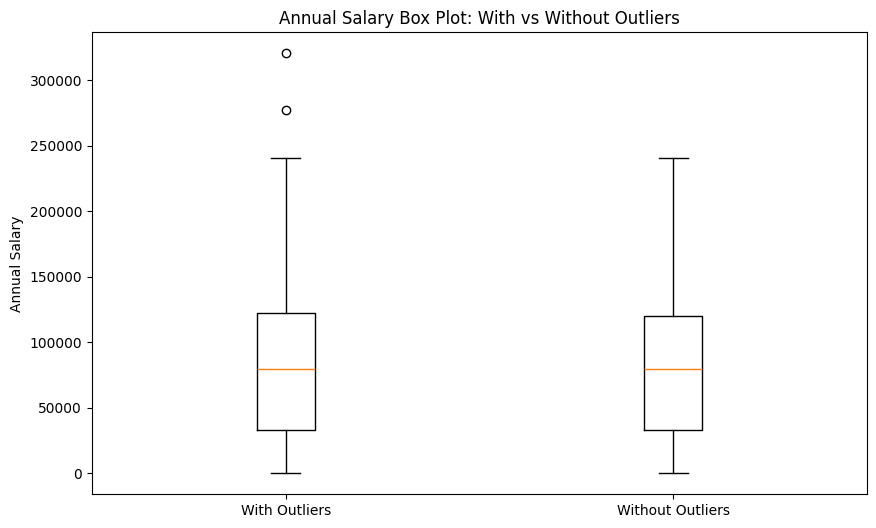

In [37]:
plt.figure(figsize = (10,6))
plt.boxplot([annual_salary, no_outliers], tick_labels=['With Outliers', 'Without Outliers'])
plt.ylabel('Annual Salary')
plt.title('Annual Salary Box Plot: With vs Without Outliers')
plt.show()

We update the `job_posting_df` by keeping `Annual_Salary` that are not outliers and replacing outlier salaries with `NaN`. This marks extreme values as missing while preserving the rest of the data for analysis.

In [38]:
job_posting_df.loc[no_outliers.index, 'Annual_Salary'] = no_outliers
job_posting_df.loc[outliers.index, 'Annual_Salary'] = np.nan

## General Research Question

Understanding the global job landscape is essential for identifying emerging opportunities, evolving skill demands, and industry-wide shifts across different regions. By analyzing job postings and employment data, we can uncover meaningful insights into how the workforce is transforming over time.

With this in mind, the group formulated the research question:

> **What are the underlying patterns and trends in the international job market?**


### EDA Question 1 - Salary and Job Fields
Job field in this case lies on their category within the `O*NET Family` categorization in the dataset. In this EDA question, the researchers aim to understand the following:
- What is the relationship between the annual salary and the job field in the dataset?
- Which job fields show the lowest and highest salary variability?
- What is the typical salary for each job field?



For this specific research question, we will be focusing on the **Annual Salary** field and the **O*NET Family** field. To make analysis easier, we will be creating a subset of the **job_posting** dataframe that only contains the necessary rows and columns and filter out any observations that do not have information about the annual salary.

In [39]:
eda_1_df = job_posting_df[['O*NET Occupation Name', 'O*NET Family', 'Annual_Salary']].dropna(subset=['Annual_Salary'], how='any')
eda_1_df.head()

,O*NET Occupation Name,O*NET Family,Annual_Salary
24,"Meeting, Convention, and Event Planners",Business and Administration,102856.0
26,Electrical Engineers,Engineering and Construction,34437.9
124,"Securities, Commodities, and Financial Service...",Business and Administration,180500.0
184,Computer Systems Engineers/Architects,Technology,54080.0
187,Reservation and Transportation Ticket Agents a...,Business and Administration,45760.0


To better understand the relationship between **Annual_Salary** and job field classifications (represented by **O\*NET Family**), we will visualize the data using a **box plot**. This allows us to observe the distribution of salaries within each job field, compare median salaries, and identify variability and outliers across different job categories.


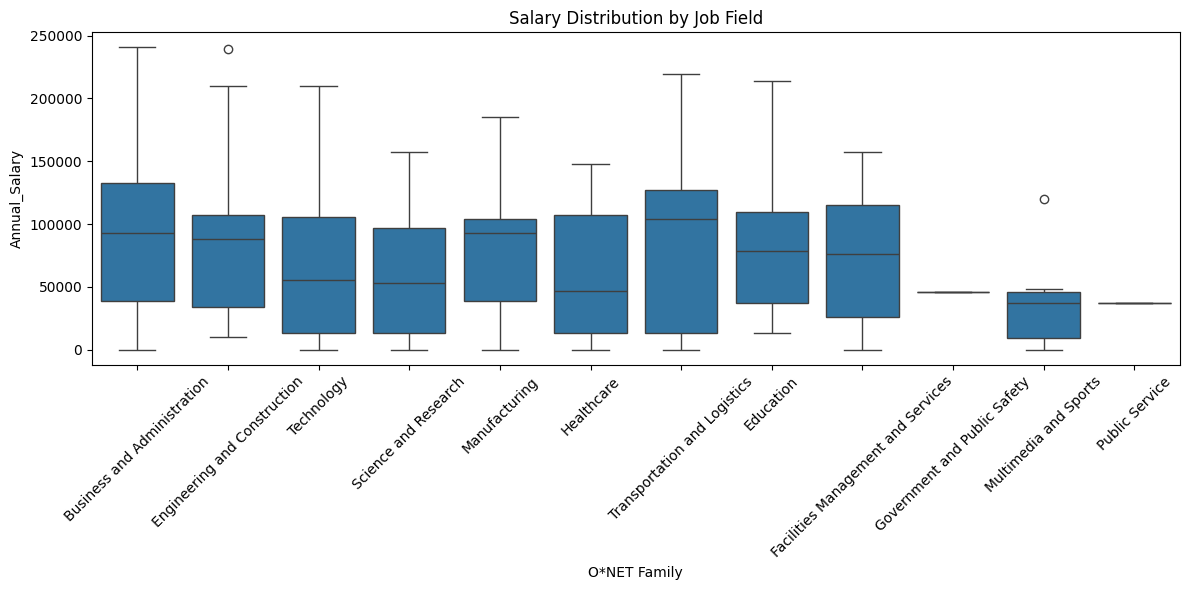

In [40]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='O*NET Family', y='Annual_Salary', data=eda_1_df)
plt.xticks(rotation=45)
plt.title('Salary Distribution by Job Field')
plt.tight_layout()
plt.show()


Based on the visualization, the following interpretations can be made:

1. **Median Salaries:**
   - Fields such as **`Transportation and Logistics`**, **`Manufacturing`**, and **`Business and Administration`** appear to have the **highest median salaries**. This suggests that jobs within these fields generally offer higher annual compensation compared to other job families.

2. **Salary Variability:**
   - The field with the **highest variability** is **`Transportation and Logistics`**, indicating a wide spread of salaries. This could be due to a mix of both **entry-level** and **high-level** positions within the same field.
   - Fields such as **`Facilities Management and Services`** and **`Public Service`** show **low salary variability**, suggesting that jobs in these fields tend to have similar pay. However, this may also be due to **limited data** for these fields, which can result in narrow distributions.
   - To further understand these patterns, the **`Seniority`** column could be used to distinguish between roles and levels within each job field.

3. **Outliers:**
   - Some fields, including **`Engineering and Construction`** and **`Multimedia and Sports`**, display **outliers** — salaries that fall far outside the typical range.
   - These outliers may indicate **high-paying specialist roles**, **executive positions**, or possibly even **data entry anomalies** that warrant further investigation.


To understand how each job field typically pays, we compute the **median annual salary** for each **O\*NET Family**. The **median** is preferred over the mean in this case because salary data often contains extreme values (e.g., executive roles) that can skew the average. 

By using the median, we get a more accurate representation of the "typical" salary within each job field.

The result is a sorted table showing the median salary per job field in descending order.


In [41]:
median_salary = eda_1_df.groupby(['O*NET Family']).agg({'Annual_Salary': ['median']})
median_salary = median_salary.sort_values(by=('Annual_Salary', 'median'), ascending=False)
median_salary

,Annual_Salary
,median
O*NET Family,
Transportation and Logistics,104000.00
Business and Administration,92500.00
Manufacturing,92500.00
Engineering and Construction,88306.80
Education,78750.00
Facilities Management and Services,76250.00
Technology,55120.00
Science and Research,53406.00


From the table above, we can observe that **`Business and Administration`** has the **highest median salary** among all job fields, indicating it generally offers more lucrative positions. On the other hand, **`Public Service`** appears to have the **lowest median salary**, suggesting that roles in this field tend to offer lower compensation compared to others.


### EDA Question 2 - Seniority and Contract Types (and Salary Relevance)
The researchers aim for this EDA question are to identify related patterns and trends within the `Seniority` and `Contract Types` variables. They will be guided by the following questions:
- What is the relationship between seniority and contract types in the dataset?
- What is the salary distribution for each combination/category of seniority and their equal contract types?
- Are certain contract types more prevalent at specific seniority levels?


For this question, we isolate the necessary columns: `Seniority`, `Contract Types`, `Annual_Salary` into a new DataFrame for convenience as well as filtering out observations that do not contain information regarding the annual salary.

In [42]:
eda_2_df = job_posting_df[['Seniority', 'Contract Types', 'Annual_Salary']].dropna(subset=['Annual_Salary'], how='any')
eda_2_df

,Seniority,Contract Types,Annual_Salary
24,Non-Managerial Position,[Full Time],102856.0
26,Non-Managerial Position,[Full Time],34437.9
124,Managerial Position,[],180500.0
184,Non-Managerial Position,"[Internship/Trainee, Internship/Trainee]",54080.0
187,Non-Managerial Position,[Remote/Flexible],45760.0
...,...,...,...
7353,Non-Managerial Position,[Full Time],113360.0
7389,Non-Managerial Position,"[Full Time, Internship/Trainee, Long Term]",45760.0
7390,Non-Managerial Position,"[Full Time, Internship/Trainee, Internship/Tra...",120000.0
7393,Managerial Position,"[Full Time, On-site]",13054.8


With this new DataFrame, we can continue by creating a relationship table for `Seniority` and `Contract Types` which we can visualize using a heat map.

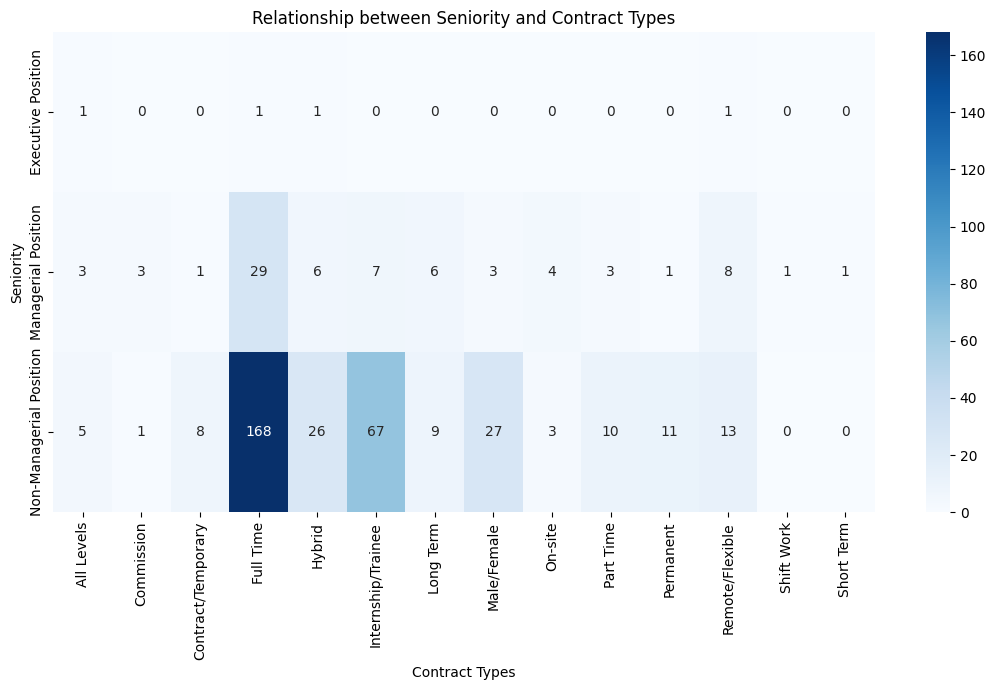

In [43]:
eda_2_df = eda_2_df.explode('Seniority')
eda_2_df = eda_2_df.explode('Contract Types')
relationship_table_eda2 = pd.crosstab(eda_2_df['Seniority'], eda_2_df['Contract Types'])
plt.figure(figsize=(11, 7))
sns.heatmap(relationship_table_eda2, annot=True, fmt='d', cmap='Blues')
plt.title('Relationship between Seniority and Contract Types')
plt.xlabel('Contract Types')
plt.ylabel('Seniority')
plt.tight_layout()
plt.show()


Based on the visualization, the following interpretations can be made:

1. **Contract Type Prevalence:**
   - `Full Time` Contract Types are to be the most prevalent among every Seniority, indicating the general popularity of `Full Time` contracts among employment listings.
   - `Internship\Trainee` Contract Types are predominant among the `Non-Managerial Position` Seniority only coming 2nd to `Full Time` Contract Types while. This indicates that `Non-Managerial Position` Seniority recieve the bulk of low experienced labor employment.

2. **Seniority Variability:**
   - The `Seniority` with the greatest amount of listings are `Non-Managerial Position`, followed by `Managerial Position`, and then lastly `Executive Position`. This shows the general demand of Seniority, with `Non-Managerial Position` having the most demand among the listings.


To visualize the salary distribution among the combinations of `Seniority` and `Contract Types`, we will utilize a boxplot separating each `Seniority` into their own `Contract Types` and `Annual_Salary` distributions.

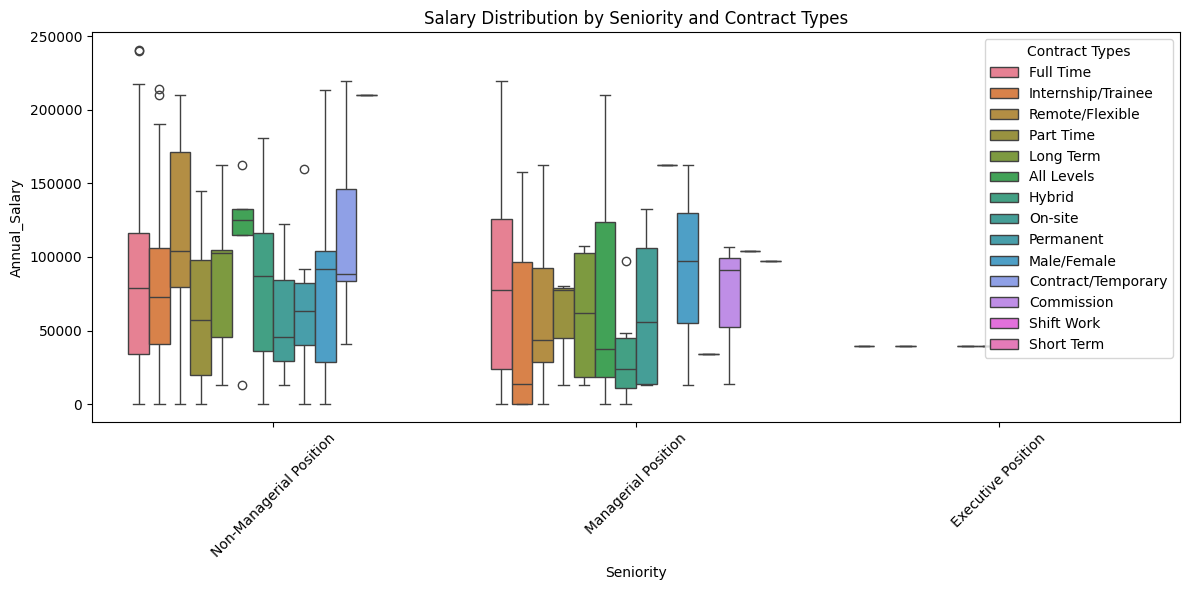

In [44]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=eda_2_df, x='Seniority', y='Annual_Salary', hue='Contract Types')
plt.title('Salary Distribution by Seniority and Contract Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Based on the visualization, the following interpretations can be made:

1. **Non-Managerial and Managerial Comparison:**
   - Surprisingly, the boxplot generally shows higher median annual salaries in the `Non Managerial Position` listings compared to the `Managerial Position` listings. There could be numerous reasons for this, one such reason could be that certain specialized senior roles are classified as `Non-Managerial Position`. Or it could mean that the employment listings for `Managerial Position` show lower salaries in the job listings that are inaccurate to the true salaries listen in the contracts.
   - The annual salaries of the `Managerial Position` listings vary less than the `Non-Managerial Position`, possibly indicating employers have a set standard for `Managerial Position` salaries.

2. **Executive Position:**
   - The `Executive Position` show very little variability due to the small amount of `Executive Position` listings available in the dataset.
   - Very little information can be collected due to insufficient sample sizes for the `Executive Position`.

### EDA Question 3 - Locations and Skills
Skills in this case lies on their category within the `Keywords` categorization in the dataset. In this EDA question, the researchers aim to understand the following:
- What is the relationship between the skills required by companies that are outsourcing to specific locations?
- What are the prevalent skill categories that exist for each location?
- Which locations have the highest demand for specific skills?

To answer this question we need to combine the job posting keywords with their corresponding countr information to prepare for skill-based analysis. First, it merges the `Keywords` column from the job postings with the `country` column from the location data. Then, it renames the `Keywords` column to `skills` for clarity. Finally, it uses the `.explode()` function to break down each list of skills into individual rows, so that each skill-country pair occupies its own row. This makes it easier to analyze how specific skills are distributed across different countries.

In [45]:
country_skills = pd.concat([job_posting_df['Keywords'], locations_df['country']], axis=1)
country_skills = country_skills.rename(columns={'Keywords': 'skills'})
country_skills = country_skills.explode('skills')
skill_counts = country_skills.groupby(['country', 'skills']).size().reset_index(name='count')

This section selects the most in-demand skill for each country by sorting and grouping the data, then keeping the top skill per country.

In [46]:
top_skills_by_country = (
    skill_counts.sort_values(['country', 'count'], ascending=[True, False])
                .groupby('country')
                .head(1)
                .reset_index(drop=True)
)

top_skills_by_country

,country,skills,count
0,Argentina,Programming Languages,7
1,Australia,Programming Languages,35
2,Austria,ERP & Business Software,40
3,Belgium,ERP & Business Software,32
4,Brazil,Programming Languages,187
5,Bulgaria,ERP & Business Software,2
6,Canada,Marketing & Social Media Tools,14
7,Chad,DevOps & CI/CD,4
8,Chile,Programming Languages,1
9,China,ERP & Business Software,52


This section counts how many countries have each skill as their top demand. It groups top_skills_by_country by skill, counts the number of countries per skill, and sorts the result in descending order.

In [47]:
skill_top_country_counts = top_skills_by_country.groupby('skills').size().reset_index(name='num_countries')
skill_top_country_counts = skill_top_country_counts.sort_values(by='num_countries', ascending=False)
skill_top_country_counts

,skills,num_countries
2,ERP & Business Software,25
6,Programming Languages,19
4,Marketing & Social Media Tools,4
5,Other and Broader Skills,4
0,Analytics & BI,2
1,DevOps & CI/CD,1
3,Frameworks & Libraries,1


To understand how prominent each skill is within a country, we first calculated the total number of skill mentions per country. We then merged this with the individual skill counts and computed the skill ratio, which represents the percentage share of each skill in that country’s overall skill demand. This helps identify which skills are most dominant within each country's job market.

In [48]:
total_skills_per_country = skill_counts.groupby('country')['count'].sum().reset_index(name='total_skills')
total_skills_per_country = total_skills_per_country.sort_values(by='total_skills', ascending=False)

country_skill_ratio = skill_counts.merge(total_skills_per_country, on='country')
country_skill_ratio['skill_ratio'] = country_skill_ratio['count'] / country_skill_ratio['total_skills'] * 100

We also calculated the average skill ratio for each skill across all countries to see how dominant a skill is globally. We also computed the total count of each skill to show how frequently it appears overall. Merging these two metrics provides a clearer picture of both the relative importance and global demand for each skill.

In [49]:
avg_skill_ratio = country_skill_ratio.groupby('skills')['skill_ratio'].mean().reset_index(name='avg_skill')
total_skill_counts = country_skill_ratio.groupby('skills')['count'].sum().reset_index(name='total_count')
avg_skill_ratio = avg_skill_ratio.merge(total_skill_counts, on='skills')
avg_skill_ratio = avg_skill_ratio.sort_values(by='avg_skill', ascending=False)

avg_skill_ratio

,skills,avg_skill,total_count
7,ERP & Business Software,32.035308,4757
15,Programming Languages,30.386993,5207
14,Other and Broader Skills,17.722781,1702
10,Marketing & Social Media Tools,11.137011,877
11,Methodologies,8.943668,1422
0,Analytics & BI,8.383129,573
8,Frameworks & Libraries,6.308345,880
6,DevOps & CI/CD,4.209012,606
17,Tools & Platforms,3.776549,504
3,Cloud Services,3.266781,584


To identify which countries lead in specific skills, we used two approaches. First, we filtered for skills with at least 250 mentions and selected the top country per skill based on the highest skill ratio — showing where a skill is most dominant relative to others.

In [50]:
MIN_COUNT = 250

top_countries_per_skill = (
    country_skill_ratio[country_skill_ratio['count'] >= MIN_COUNT]  
    .sort_values(['skills', 'skill_ratio'], ascending=[True, False]) 
    .groupby('skills')
    .head(1)
    .reset_index(drop=True)
    .sort_values(by='skill_ratio', ascending=False)  
)

top_countries_per_skill

,country,skills,count,total_skills,skill_ratio
2,Germany,ERP & Business Software,871,2262,38.505747
7,India,Programming Languages,1047,3354,31.216458
5,United States,Methodologies,528,5758,9.169851
6,United States,Other and Broader Skills,526,5758,9.135116
3,India,Frameworks & Libraries,306,3354,9.123435
1,India,DevOps & CI/CD,286,3354,8.527132
0,India,Cloud Services,259,3354,7.722123
4,United States,Marketing & Social Media Tools,316,5758,5.488017


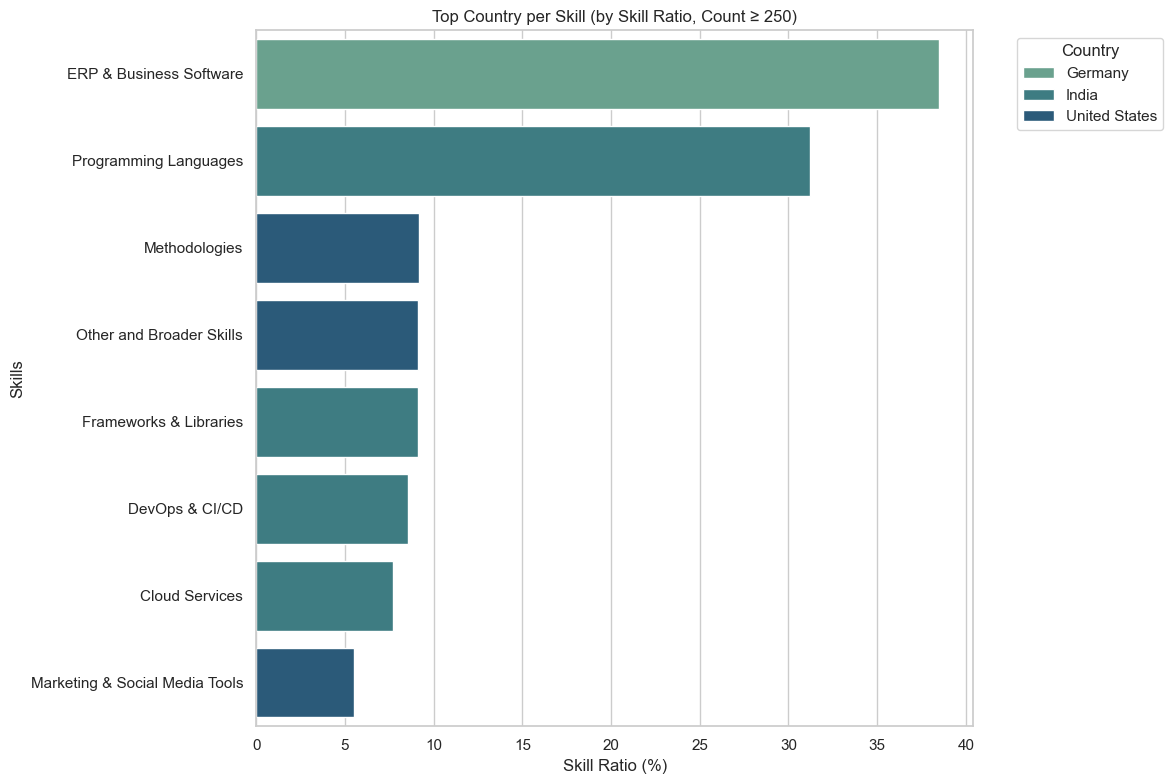

In [51]:
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

sns.barplot(
    data=top_countries_per_skill,
    x='skill_ratio', 
    y='skills', 
    hue='country', 
    dodge=False, 
    palette='crest'
)

plt.xlabel("Skill Ratio (%)")
plt.ylabel("Skills")
plt.title("Top Country per Skill (by Skill Ratio, Count ≥ 250)")
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

We also selected the top country per skill based on raw count, highlighting where each skill appears most frequently overall. Both methods help reveal patterns of specialization and demand across countries.

In [52]:
top_countries_per_skill = (
    country_skill_ratio
    .sort_values(['skills', 'count'], ascending=[True, False])  
    .groupby('skills')
    .head(1)                                                     
    .reset_index(drop=True)
    .sort_values(by='count', ascending=False)                    
)

top_countries_per_skill

,country,skills,count,total_skills,skill_ratio
7,United States,ERP & Business Software,1587,5758,27.561653
15,United States,Programming Languages,1565,5758,27.179576
11,United States,Methodologies,528,5758,9.169851
14,United States,Other and Broader Skills,526,5758,9.135116
10,United States,Marketing & Social Media Tools,316,5758,5.488017
8,India,Frameworks & Libraries,306,3354,9.123435
6,India,DevOps & CI/CD,286,3354,8.527132
3,India,Cloud Services,259,3354,7.722123
1,United States,CMS & Web Platforms,163,5758,2.830844
17,United States,Tools & Platforms,151,5758,2.622438


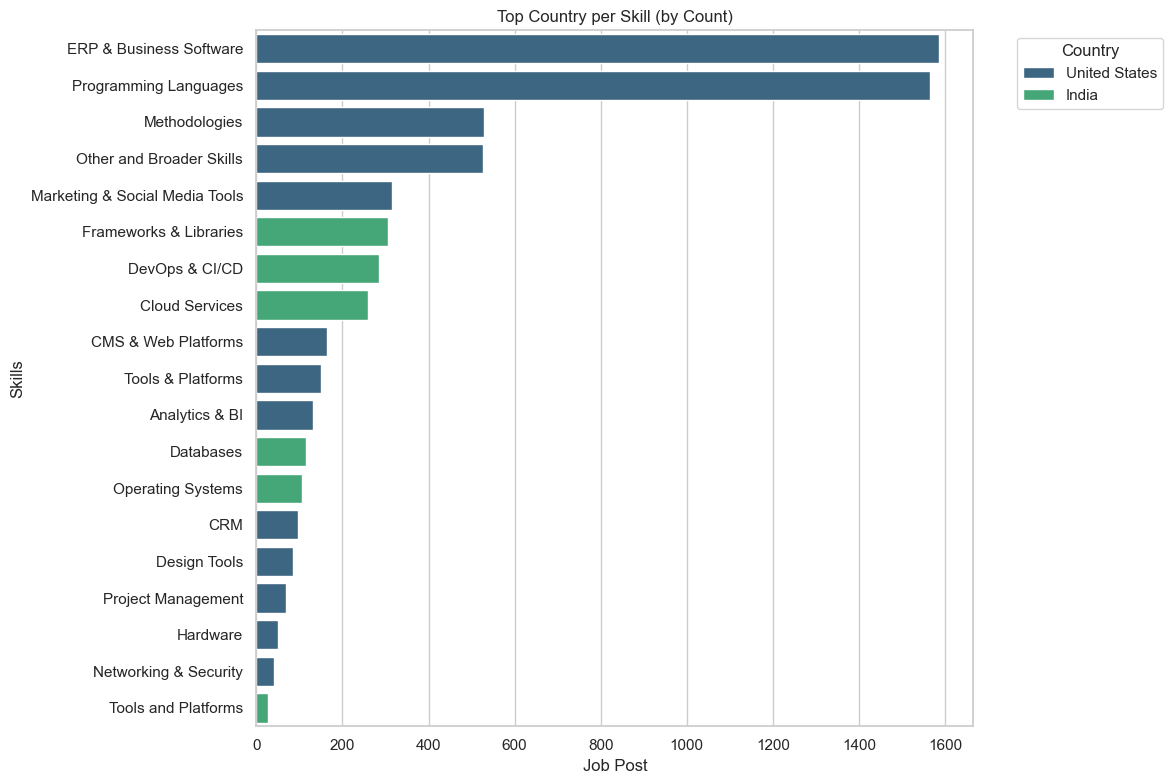

In [53]:
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

sns.barplot(
    data=top_countries_per_skill, 
    x='count', 
    y='skills', 
    hue='country', 
    dodge=False,
    palette='viridis'
)

plt.xlabel("Job Post")
plt.ylabel("Skills")
plt.title("Top Country per Skill (by Count)")
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Based on the insights, **ERP & Business Software** has the highest global demand with a **32.04%** average share and **4,757 job posts**, while Tools and Platforms is the lowest at **0.82%** with **76 job posts**. The U.S. leads in total ERP job posts **(1,587, 27.56%)**, but Germany has the highest skill ratio at **38.51%** among countries with at least 250 ERP job posts.

## Data Mining

### Data Mining Technique

The group has already identified the proper classifications of the main variables in the dataset. The current structure of this project is not really based as a recommendation program as this will require user interaction. Ruling out `clustering` and `collaborative filtering`, the proper data mining technique to be used in this project is `rule mining`.

Why `Association Rule Mining` works better for the group
1. All major variables have already been systematically classified into      meaningful categories.
2. Identifying patterns will be easier due to uncovering relationships between job characteristics, skills, locations, and salary.
3. All the relationships are quantifiable as measurable metrics are provided to validate the strength of the relationships.

These are the rules that the group have decided in doing the data mining. It focuses on rules that are related to the EDA question to have more impacct on having a concrete analysis. Due to time constraints and the complexity of the each possible rule combination, the group has decided to do one assocation rules per EDA:

EDA 1:
- `{Technology} -> {Medium Salary Range}` - Technology careers tends to have a medium salary range
- `{Business and Administration} -> {High Salary Range}` - Business and Administration tend to have a higher salary range

EDA 2:
- `{Managerial Position} -> {Full Time}` - Middle management positions often tends to have a more solid position within the company
- `{Non-Managerial Position} -> {Full Time}` - Non-managerial positions often have a solid position within the company even if not in management

EDA 3:
- `{United States}  -> {ERP & Business Software, Programming Languages}` - Market demand in US are often consisting technology and business skills
- `{India} -> {Frameworks & Libraries, DevOps & CI/CD}` - Market demand in India has a leading outlook for frameworks and libraries


### Data Pre-processing for Data Mining

In preparation for pre-processing the current data that has already been categorized in earlier segments of this notebook, a copy will of the `job_posting_df` will be made to avoid confusion for later analysis. The group has also created an empty `data_mined_df` to add the variables that will be used for finding various associations

In [54]:
data_df = job_posting_df.copy() # create a copy of the DataFrame for further processing

data_mined_df = pd.DataFrame()

For the antecedent of EDA 1, the group needs to add `Business Administration` and `Technology` into the `data_mined_df` which will be used for later processing. The group wanted to focus on these two `O*NET Family` as they produced interesting results; `Business Administration` careers among the having one of the `highest median annual salary` whereas `Technology` falling under the a `medium median annual salary`. The group wanted to identify the associations between these two variables as there is a preconceived perspective among these two career fields

In [55]:
onet_family = [ 'Business and Administration', 'Technology']

# Create columns for each O*NET family that this study will be focusing on for data mining
for f in onet_family:
    data_mined_df[f] = data_df['O*NET Family'].apply(lambda x: 1 if f in x else 0)

print(data_mined_df[list(onet_family)].sum())

Business and Administration    2861
Technology                     1342
dtype: int64


For the consequent of EDA 1, the group needs to process the current `Annual_Salary` into both `Medium_Salary` and `High_Salary` to determine their range and relevance. It is assumed that a `Medium_Salary` falls under 30,000 to 80,000 dollars and a `High_Salary` is an amount greater than 80,000. Since multiple countries, careers, and dollar exchange rate, the group assumed that these values cover all aspects of all the possible varaibles that can affect the perception towards what makes a salary fall from medium to high. 

In [56]:
# Create a High Salary column based on the Annual_Salary value comparison
data_mined_df["High_Salary"] = (data_df['Annual_Salary'] >= 80000.0).astype(int)
data_mined_df["Medium_Salary"] = ((data_df['Annual_Salary'] >= 30000.0) & (data_df['Annual_Salary'] < 80000.0)).astype(int)

# For better visualization to show the whether the salary falls under the high salary category
data_mined_df["Annual_Salary"] = data_df['Annual_Salary']

# print(data_mined_df["High_Salary"].value_counts())

# Display the first 10 rows of the relevant columns
print(data_mined_df[["Annual_Salary", "High_Salary", "Medium_Salary"]].dropna().head(20))

# Display the percentage of high salary jobs and medium salary jobs
high_salary_percentage = (data_mined_df["High_Salary"].sum() / len(data_df)) * 100
medium_salary_percentage = (data_mined_df["Medium_Salary"].sum() / len(data_df)) * 100

print(f"\nPercentage of high salary jobs (≥ $80,000): {high_salary_percentage:.2f}%")
print(f"Percentage of medium salary jobs ($30,000 - $79,999): {medium_salary_percentage:.2f}%")

     Annual_Salary  High_Salary  Medium_Salary
24        102856.0            1              0
26         34437.9            0              1
124       180500.0            1              0
184        54080.0            0              1
187        45760.0            0              1
196           89.7            0              0
236        91613.6            1              0
239       105000.0            1              0
240           89.7            0              0
242       125500.0            1              0
285           94.3            0              0
410        25352.9            0              0
411        80000.0            1              0
415        95680.0            1              0
424        45760.0            0              1
439       104000.0            1              0
491        13054.8            0              0
515       157500.0            1              0
529       107500.0            1              0
588        45760.0            0              1

Percentage o

For the antecedent of EDA 2, the group needs to add `Managerial Position` and `Non-Managerial Position` into the `data_mined_df` to understand whether they have an association towards `Contract Types`. The group separated these two categories even if they have the same consequent since having both managerial and non-managerial on the same seniority makes a contradictory classification. Hence, the group will be working with two different variables separately to understand the possible associations much better later.

In [57]:
# Shortened the seniority mapping for clarity
seniority_clean_mapping ={
    'Managerial Position': 'Managerial',
    'Non-Managerial Position': 'Non-Managerial'
}

# New mapping for the Seniority column
data_df['Seniority_Clean'] = data_df['Seniority'].map(seniority_clean_mapping)

# Create columns for each seniority category
for s in seniority_clean_mapping.values():
    data_mined_df[s] = (data_df['Seniority_Clean'] == s).astype(int)

print(data_mined_df[['Managerial', 'Non-Managerial']].sum())

Managerial        1433
Non-Managerial    6171
dtype: int64


For the consequent of EDA 2, the group wanted to focus on `Full Time` contract types since this varaible displays the majority of the data in the dataset. A lot of `Managerial` and `Non-Managerial` positions often tend to have `Full Time` contract types so this allows us to better predict if that association is true. There was consideration whether the group should have included `Internship/Trainee` in understanding the `Non-Managerial` positions but this skews the support to have a smaller value so the group opted to just focus on `Full Time` positions for now.

In [58]:
contract_clean_mapping = {
    'Full Time': 'Full_Time'
}

# Create a function to clean and standardize contract types
def clean_contract_types(ct_list):
    return list(set(contract_clean_mapping.get(x, x) for x in ct_list))

# Apply the cleaning function to the 'Contract Types' column
data_df['Contract_Types_Clean'] = data_df['Contract Types'].apply(clean_contract_types)

# Get all unique contract types from the cleaned data
all_contract_types = set().union(*data_df['Contract_Types_Clean'])

# Create binary indicator columns for each contract type
for ct in all_contract_types:
    data_mined_df[ct] = data_df['Contract_Types_Clean'].apply(lambda x: 1 if ct in x else 0)

print("Contract Counts:")
print(data_mined_df[['Full_Time']].sum())

Contract Counts:
Full_Time    4807
dtype: int64


For the antecedent of EDA 3, the group wanted to focus on two leading countries with the job postings which are the `United States` and `India`. These two are the leading countries when the group displayed in EDA 3 the raw skill count number for each skill, which allows us to understand and check possible relationships between the countries and skills.

In [59]:
# Create country indicator columns PROPERLY
countries = ['United States', 'India']

for country_name in countries:
    # Use the FULL locations_df to create indicators
    data_mined_df[country_name] = locations_df['country'].apply(
        lambda x: 1 if country_name in str(x) else 0
    )

# Verify the counts
print("Total US entries:", data_mined_df['United States'].sum())
print("Total India entries:", data_mined_df['India'].sum())

Total US entries: 2386
Total India entries: 1028


For the consequent of EDA 3, the group wanted to focus on two leading skills for the countries. For the `United States`, `Programming Languages` and `ERP & Business Software` are the two leading skills by raw count. Whereas in `India`, `Frameworks & Libraries` and `DevOps & CI/CD` are lead the market by raw skill count. The group wanted to understand whether there is a association towards these specific skills towards the respective countries to check if they both specialize on these skills.

In [60]:
# Create skill indicator columns
skills = ['Programming Languages', 'ERP & Business Software', 'Frameworks & Libraries', 'DevOps & CI/CD']

# Create binary indicator columns for each skill
for skill in skills:
    data_mined_df[skill] = data_df['Keywords'].apply(lambda x: 1 if skill in x else 0)

# Verify the counts for each skill
print("Total Programming Languages entries:", data_mined_df['Programming Languages'].sum())
print("Total ERP & Business Software entries:", data_mined_df['ERP & Business Software'].sum())
print("Total Frameworks & Libraries entries:", data_mined_df['Frameworks & Libraries'].sum())
print("Total DevOps & CI/CD entries:", data_mined_df['DevOps & CI/CD'].sum())

Total Programming Languages entries: 3557
Total ERP & Business Software entries: 3392
Total Frameworks & Libraries entries: 404
Total DevOps & CI/CD entries: 314


### Algorithm Implementation

The `rule_miner.py` file contains all the necessary functions to accomplish the data mining segment of the notebook. The group imported the `RuleMiner class` which contains the `get_support`, `merge_itemsets`, `get_rules`, `get_frequent_itemsets`, `get_confidence`, and `get_association_rules` which mainly took inspiration from the `Notebook 7 Activity` assignment.

In [61]:
from rule_miner import RuleMiner

#### Support Checking for each Antecedent and Consequent Pair

Before starting getting the actual rules, the group has decided on checking each support for each variable pair. Basically, this is just an initial testing.

In [62]:
# Initialize the RuleMiner with support and confidence thresholds
support = 1
confidence = 0.0001

# Create an instance of RuleMiner with the specified support and confidence
rule_miner = RuleMiner(support, confidence)

In [63]:
# Check support for key itemsets
print("Support for Technology:", RuleMiner.get_support(rule_miner, data_mined_df, ["Technology"]))
print("Support for Medium_Salary:", RuleMiner.get_support(rule_miner, data_mined_df, ["Medium_Salary"]))
print("Support for both:", RuleMiner.get_support(rule_miner, data_mined_df, ["Technology", "Medium_Salary"]))

print("\nSupport for Business and Administration:", RuleMiner.get_support(rule_miner, data_mined_df, ["Business and Administration"]))
print("Support for High_Salary:", RuleMiner.get_support(rule_miner, data_mined_df, ["High_Salary"]))
print("Support for both:", RuleMiner.get_support(rule_miner, data_mined_df, ["Business and Administration", "High_Salary"]))

Support for Technology: 1342
Support for Medium_Salary: 75
Support for both: 9

Support for Business and Administration: 2861
Support for High_Salary: 157
Support for both: 66


In [64]:
print("Support for Managerial Position:", RuleMiner.get_support(rule_miner, data_mined_df, ["Managerial"]))
print("Support for Positions:", RuleMiner.get_support(rule_miner, data_mined_df, ["Full_Time"]))
print("Support for both (Managerial and Positions):", RuleMiner.get_support(rule_miner, data_mined_df, ["Managerial", "Full_Time"]))

print("\nSupport for Non-Managerial Position:", RuleMiner.get_support(rule_miner, data_mined_df, ["Non-Managerial"]))
print("Support for Positions:", RuleMiner.get_support(rule_miner, data_mined_df, ["Full_Time"]))
print("Support for both (Non-Managerial and Positions):", RuleMiner.get_support(rule_miner, data_mined_df, ["Non-Managerial", "Full_Time"]))

Support for Managerial Position: 1433
Support for Positions: 4807
Support for both (Managerial and Positions): 918

Support for Non-Managerial Position: 6171
Support for Positions: 4807
Support for both (Non-Managerial and Positions): 3874


In [65]:
print("Support for US:", RuleMiner.get_support(rule_miner, data_mined_df, ["United States"]))
print("Support for Business Software and Programming Languages:", RuleMiner.get_support(rule_miner, data_mined_df, [ "ERP & Business Software", "Programming Languages"]))
print("Support for both (United States and Skills):", RuleMiner.get_support(rule_miner, data_mined_df, ["United States",  "ERP & Business Software", "Programming Languages"]))


print("\nSupport for India:", RuleMiner.get_support(rule_miner, data_mined_df, ["India"]))
print("Support for Frameworks and DevOps:", RuleMiner.get_support(rule_miner, data_mined_df, ["Frameworks & Libraries", "DevOps & CI/CD"]))
print("Support for both (India and Tech Skills):", RuleMiner.get_support(rule_miner, data_mined_df, ["India", "Frameworks & Libraries", "DevOps & CI/CD"]))



Support for US: 2386
Support for Business Software and Programming Languages: 1766
Support for both (United States and Skills): 679

Support for India: 1028
Support for Frameworks and DevOps: 118
Support for both (India and Tech Skills): 47


#### Rule Finding

In [66]:
# If we replace the support with 1 and confidence with 0.1
# This will yield more rules, but with lower confidence

support = 100
confidence = 0.6

# Create an instance of RuleMiner with the specified support and confidence
miner = RuleMiner(support, confidence)

# Get the association rules from the data mined DataFrame
rules = miner.get_association_rules(data_mined_df)

# Set the initial rules for each EDA pairs
eda1_rule1 = [["Technology"], ["Medium_Salary"]]
eda1_rule2 = [["Business and Administration"], ["High_Salary"]]

eda2_rule1 = [["Managerial"], ["Full_Time"]]
eda2_rule2 = [["Non-Managerial"], ["Full_Time"]]

eda3_rule1 = [["United States"], [ "ERP & Business Software", "Programming Languages"]]
eda3_rule2 = [["India"], ["Frameworks & Libraries", "DevOps & CI/CD"]]

# Initialize a list to store the rules that match the criteria
rules_found = []

# Check if the rules match the predefined EDA rules
# and append them to the rules_found list
for rule in rules:
    X, Y = rule
    if (set(X) == set(eda1_rule1[0]) and set(Y) == set(eda1_rule1[1])) or \
       (set(X) == set(eda1_rule2[0]) and set(Y) == set(eda1_rule2[1])) or \
       (set(X) == set(eda2_rule1[0]) and set(Y) == set(eda2_rule1[1])) or \
       (set(X) == set(eda2_rule2[0]) and set(Y) == set(eda2_rule2[1])) or \
       (set(X) == set(eda3_rule1[0]) and set(Y) == set(eda3_rule1[1])) or \
       (set(X) == set(eda3_rule2[0]) and set(Y) == set(eda3_rule2[1])):
        rules_found.append(rule)

# Display the rules found that match the criteria
if (rules_found):
    print("Rules found:")
    
    for x, y in rules_found:
        current_rule = [x, y]
        print(f"Rule: {x} -> {y}")
        print(f"Support: {miner.get_support(data_mined_df, x+y)}")
        print(f"Confidence: {miner.get_confidence(data_mined_df, current_rule):.2f}\n")
        print("=" * 50)

else:
    print("No rules found matching the criteria.")

Rules found:
Rule: ['Managerial'] -> ['Full_Time']
Support: 918
Confidence: 0.64

Rule: ['Non-Managerial'] -> ['Full_Time']
Support: 3874
Confidence: 0.63



### Analysis of Results


#### Results for EDA 1

Both `{Technology} -> {Medium Salary Range}` and `{Business and Administration} -> {High Salary Range}` showed that there are no rules displayed under the current threshold of `support = 100` and `confidence level = 0.6`. When the group tested the support for each values involved, the initial testing demonstrated the following results:

Support for Technology: 1342 <br>
Support for Medium_Salary: 75 <br>
Support for both: 9 <br>
<br>
Support for Business and Administration: 2861 <br>
Support for High_Salary: 157 <br>
Support for both: 66

Now, when solving the confidence of each antecedent and consequent pair using the formula: 
$$Confidence Value = support(X and Y) \div support(X)$$

For `{Technology} -> {Medium Salary Range}`, the confidence value will be `0.0067` and `{Business and Administration} -> {High Salary Range}` will have a value of `0.023`. These values do not reach the current confidence level of 0.6 and the support not reaching 100, therfore, this study can conclude that there is no significant association between these two pairs. This raises the caution to job seekers and current university student about preconceptions towards the current industry. `Technology` and `Business Administration` careers does not necessarily offer a luxurious salary.

`Caution`: Although there is no significant relationship with THIS dataset, there is a significant amount of observations involved in the dataset that does not include a salary amount. This has an effect with how the group conducts the data mining segment of this project, but this does not also diminish the possible truths that the association rule mining for these pairs gave us. This is a caution that a different dataset may give a different result, but the current dataset being used by the group is restricted to what has already been pre-processed in earlier segments.


#### Results for EDA 2

Both `{Managerial Position} -> {Full Time}` and `{Non-Managerial Position} -> {Full Time}` displayed association rules that falls within the current threshold `support = 100` and `confidence level = 0.6`. When running the algorithm, it produced the following rules:

Rule: ['Non-Managerial'] -> ['Full_Time'] <br>
Support: 3874 <br>
Confidence: 0.63 <br>

Rule: ['Managerial'] -> ['Full_Time'] <br>
Support: 918 <br>
Confidence: 0.64

For `{Managerial Position} -> {Full Time}` it produced a a confidence level of `0.64` and `{Non-Managerial Position} -> {Full Time}` produced `0.63`. The support also exceeds the value of 100, which means that these association rules are valid. Therefore, the group can conclude that there is an association between these pairs. 

The similar confidence levels between both rules demonstrate that employment type is consistent across hierarchical levels. In this dataset, there is a substantial support for Non-Managerial positions having full-time contract types compared to the number of managerial positions. This aligns with the typical organizational structure with managerial positions being a smaller portion of the company and the non-managerial positions being a larger portion but still having the same contract type. This suggests that there is a stable employment pattern where full-time positions are the standard for for both managerial and non-managerial roles. This analysis provides useful information for job seekers that are seeking stable employment.



#### Results for EDA 3

Both `{United States}  -> {ERP & Business Software, Programming Languages}` and `{India} -> {Frameworks & Libraries, DevOps & CI/CD}` showed that there is no significant association between these pairs under the current `support = 100` and `confidence level = 0.6`. When the group tested the support for each values involved, the initial testing demonstrated the following results:

Support for US: 2386 <br>
Support for Business Software and Programming Languages: 1766 <br>
Support for both (United States and Skills): 679 <br>

Support for India: 1028 <br>
Support for Frameworks and DevOps: 118 <br>
Support for both (India and Tech Skills): 47

For `{United States}  -> {ERP & Business Software, Programming Languages}`, the confidence value will be `0.28` and `{India} -> {Frameworks & Libraries, DevOps & CI/CD}` will have a value of `0.046`. These values do not reach the confidence level of 0.6 and for `India` the support does not reach 100, therfore, this study can conclude that there is no significant association between these two pairs. This two skills are the highest for each country and finding no rules indicates that current perceptions towards the specialization of each country is oversimplified. The `United States` is a powerhouse in technology and enterprise solutions, but this does not restrict their specialization to those skills as more countries are getting involved within those industries. The same can be said for `India` as a lot of IT skills are being outsourced towards the country, but does not necessarily restrict them to that specialization. 

The low confidence values suggest that these skill sets are increasingly globalized rather than geographically concentrated. This trend can be associated towards the maturation of global outsourcing markets and improved technical education worldwide. In conclusion, traditional geographic specializations in tech skills are diminishing as the talent pool becomes more diverse globally.

`Caution`: Job seekers should use the value of this section of the study to understand the current needs of the industry, but they should not be relying only on this study alone.


## Statistical Inference

### Statistical Testing: Job Field and Annual Salary

In the previous sections, we explored the relationship between **annual salary** and **job fields**, using descriptive statistics — particularly the **median** — to identify potential patterns in the data.

To strengthen our analysis and test whether these observed differences are statistically significant, we now apply a formal **hypothesis test**. Since outliers in the data are minimal and can be reasonably removed, we will focus on the **mean annual salaries** across different job fields for this test.

Specifically, we aim to determine whether the **job field** has a significant effect on the **mean annual salary**.

#### Hypotheses

**$H_0$ (null hypothesis):** There is no statistically significant difference in the mean annual salaries across different job fields.

**$H_A$ (alternative hypothesis):** There is a statistically significant difference in the mean annual salaries across different job fields.

#### One-Way ANOVA Test for Differences in Mean Salaries Across Job Fields

To determine whether job field has a statistically significant effect on mean annual salary, we use the **One-Way Analysis of Variance (ANOVA)** test. This test is appropriate because we are comparing the means of more than two independent groups (job fields), and we want to understand if the variation in mean salaries is greater between job fields than within them.

However, to ensure the validity of our test, we will be checking for the following assumptions that must be met when using ANOVA:

- **Independence of Observations** - The observations within each job field should be independent of each other.
- **Normality** - The data within each group (job field) should ideally be normally distributed.
- **Homogeneity of Variances** - The variance of the data should be roughly equal across all job fields being compared.

#### Assumption 1 - Independence of Observations
Since each job posting in the dataset is not related with each other -- meaning each observation in the dataset does not influence the value of any other observation -- then it is safe to say that the observations in our dataset is **independent**.

#### Assumption #2 - Normality of Salary Across Different Job Fields

To determine whether the annual salary distribution within each job field is approximately normal, we will use **Q-Q plots** (quantile-quantile plots). These visualizations help assess how closely the distribution of salary data follows a normal distribution.

As part of this process, we will also **remove observations** with no information about annual salary and **filter out job fields** with insufficient data — specifically those with very few observations — to ensure a more reliable analysis. As a result, our comparison will focus only on job fields with an adequate number of salary entries, rather than the entire dataset.

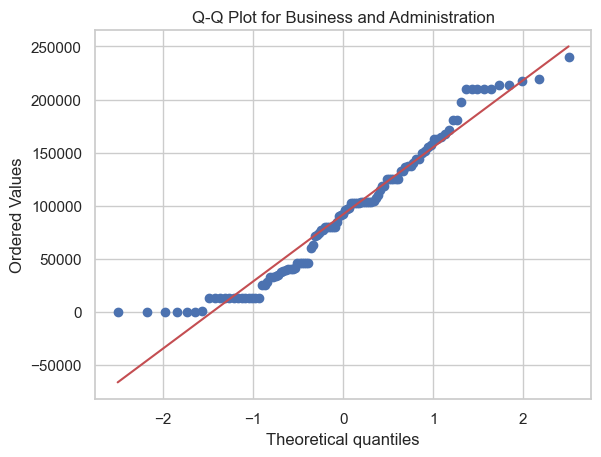

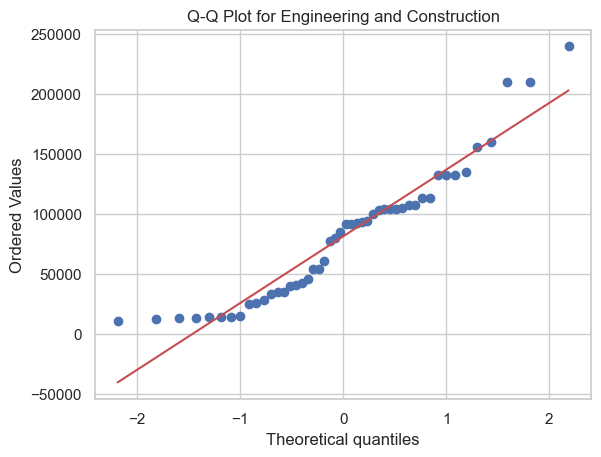

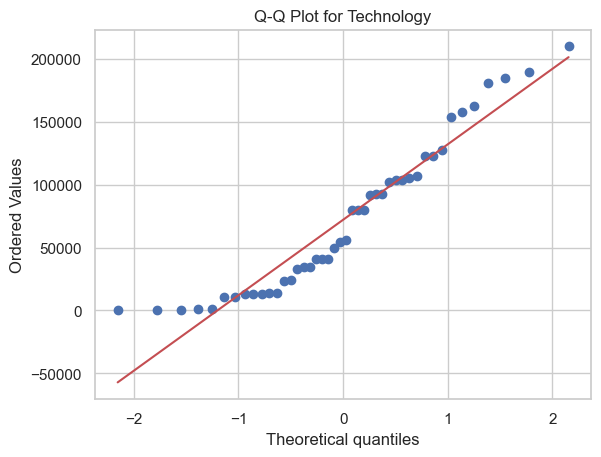

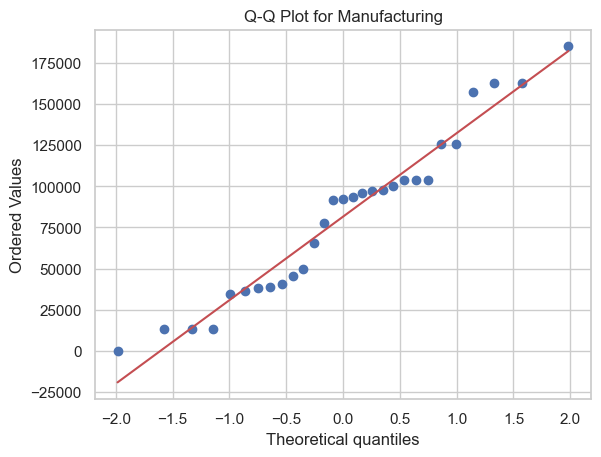

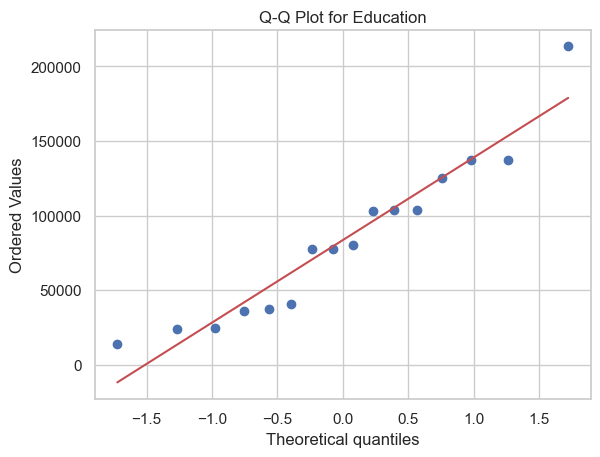

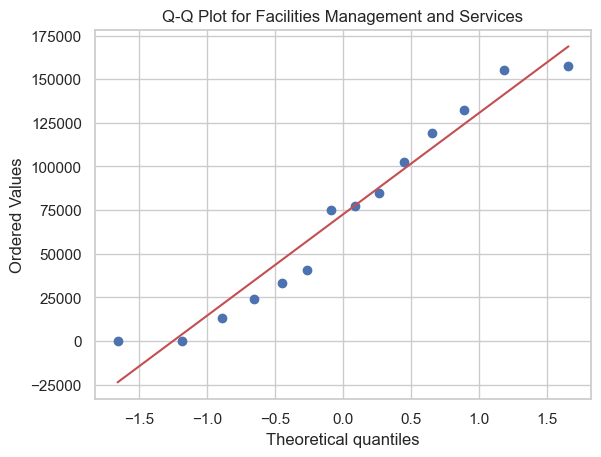

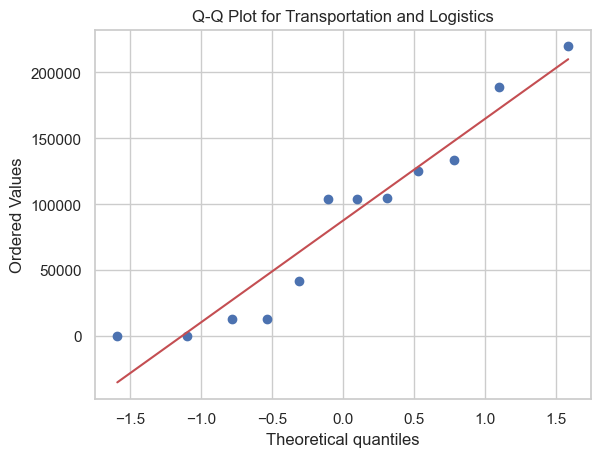

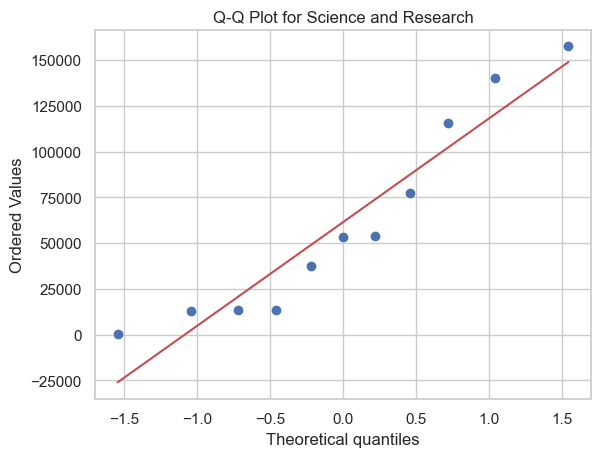

In [67]:
# Drop rows where annual_salary is null
stat_1_df = job_posting_df.dropna(subset='Annual_Salary')

# Drop columns where number of observations is less than 10
job_fields = stat_1_df['O*NET Family'].value_counts()
job_fields = job_fields[job_fields > 10].index

# Update the filtered data that will be used for statistical testing
stat_1_df = stat_1_df[stat_1_df['O*NET Family'].isin(job_fields)]

for field in job_fields:
    stats.probplot(stat_1_df[stat_1_df['O*NET Family'] == field]['Annual_Salary'], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {field}')
    plt.show()


Since the Q-Q plots for the annual salaries within each job field appear mostly linear, we can approximate that the data is **approximately normally distributed**.

#### Assumption #3 - Homogeneity of Variances

For the last requirement, we will be checking if the **variance** or **spread** of the data is roughly equal across all the job fields being compared. For this, we will be using the **Levene Test** to assess the equality of variances between the groups.

**Levene's Test** is a statistical method used to determine whether the variances across multiple groups are equal. This is important when performing analyses like **ANOVA**, which assume that group variances are homogeneous.

- **Null Hypothesis ($H_0$):** The variances are equal across all groups.
- **Alternative Hypothesis ($H_A$):** At least one group has a different variance.

Since we are checking whether our data meets the assumption of equal variances, our goal is to **fail to reject the null hypothesis**. A **high p-value** (typically greater than **0.05**) would indicate that there is no significant difference in variances, meaning the assumption holds.


In [68]:
groups = stat_1_df.groupby('O*NET Family')['Annual_Salary']
groups = [group for job_field, group in groups]
stat, p = stats.levene(*groups)

print("Levene’s Test Statistic:", stat)
print("p-value:", p)

if p < 0.05:
    print("Variances are significantly different.")
else:
    print("Variances are equal across groups.")


Levene’s Test Statistic: 0.8435354375705675
p-value: 0.552031423221824
Variances are equal across groups.


Since the variance or spread of annual salaries is **roughly equal** across all job fields being compared, the assumption of homogeneity of variances is **satisfied**.

This means we can **safely proceed** with the next step which is conducting the actual hypothesis test to determine whether there are statistically significant differences in mean annual salaries across job fields.

#### One-Way ANOVA Testing
Now that we've **satisfied** all the necessary assumptions for One-Way ANOVA, we can now proceed with testing our hypothesis.

In [69]:
from scipy.stats import f_oneway

f_stat, p_value = f_oneway(*groups)

print("F-statistic:", f_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis — there is a significant difference between group means.")
else:
    print("Fail to reject the null — no significant difference between group means.")


F-statistic: 0.8492694234687719
p-value: 0.5473696192137714
Fail to reject the null — no significant difference between group means.


Since the computed **p-value (0.5473) is greater than the significance level (0.05)**, we **fail to reject the null hypothesis**. This means that there is no significant difference in the mean annual salaries across different job fields included in the analysis. 

#### Interpretation of Results

While the exploratory data analysis (EDA Question 1) suggested that some job fields tend to have higher average annual salaries than others, the results of the **One-Way ANOVA** test indicate that these observed differences are **not statistically significant**. In other words, the variations in mean salaries across job fields were **not large enough**  to conclude that job field is a significant factor in determining annual salary.

Although the data satisfied all three assumptions required for ANOVA, it is important to note that the **number of entries per job field was unequal**. Some job fields had significantly more observations than others, which can affect the sensitivity of the ANOVA test. This imbalance may have limited our ability to detect real differences in salary between job fields.

Overall, the findings suggest that **job field alone may not be the primary factor influencing annual salary**. This encourages further investigation into **other variables** that might better explain the differences in pay across jobs.


### Statistical Testing: Seniority and Contract Types

Previously, the relationship between **Seniority** and **Contract Types** was explored using descriptive statistics to determining potential patterns in the data. 

To strengthen our analysis and test whether these observed differences are statistically significant, we now apply a formal **hypothesis test**.

In the hypothesis test, we specifically target the categorical variables: **Seniority** and **Contract type** to determine whether there is a significant relationship among them.


#### Hypotheses

**$H_0$ (null hypothesis):** There is no significant relationship between Seniority and Contract Types.

**$H_A$ (alternative hypothesis):** There is a significant relationship between Seniority and Contract Types.

#### Chi-Square Test of Independence between Seniority and Contract Types

Since the two variables are categorical, we will employ a **Chi-Square Test of Independence** to determine if the variables have a statistically significant relationship between each other or are independent.

And to ensure the validity of the results received from the hypothesis testing, certain assumptions must be met:

- **Categorical Variables** - The variables being tested on must be categorical.
- **Independence of Observations** - The observations within each cell must be independent of each other.
- **Frequency Requirements** - Atleast 80% of cells must have 5 or more observations

#### Assumption 1 - Categorical Variables

As stated before, **Chi-Square Test of Independence is the chosen test** for **Seniority** and **Contract Types** because both **Seniority** and **Contract Types** are categorical. Due to that, this consideration is met.

#### Assumption 2 - Independence of Observations

The job postings in the dataset are completely independent of each other, meaning that the observations in the dataset have no influence on the value of other observations. Therefore the observations in the dataset meet the **Independence of Observations**.

Before we continue with **Meeting Frequency Requirements**, we will first drop NaN values in the dataframe as well as drop the **Annual Salary** column since it will not be needed for the hypothesis testing.

In [70]:
eda_2_df = eda_2_df.drop('Annual_Salary', axis=1)
eda_2_df = eda_2_df.dropna()
eda_2_df

,Seniority,Contract Types
24,Non-Managerial Position,Full Time
26,Non-Managerial Position,Full Time
184,Non-Managerial Position,Internship/Trainee
184,Non-Managerial Position,Internship/Trainee
187,Non-Managerial Position,Remote/Flexible
...,...,...
7390,Non-Managerial Position,Hybrid
7393,Managerial Position,Full Time
7393,Managerial Position,On-site
7520,Non-Managerial Position,Long Term


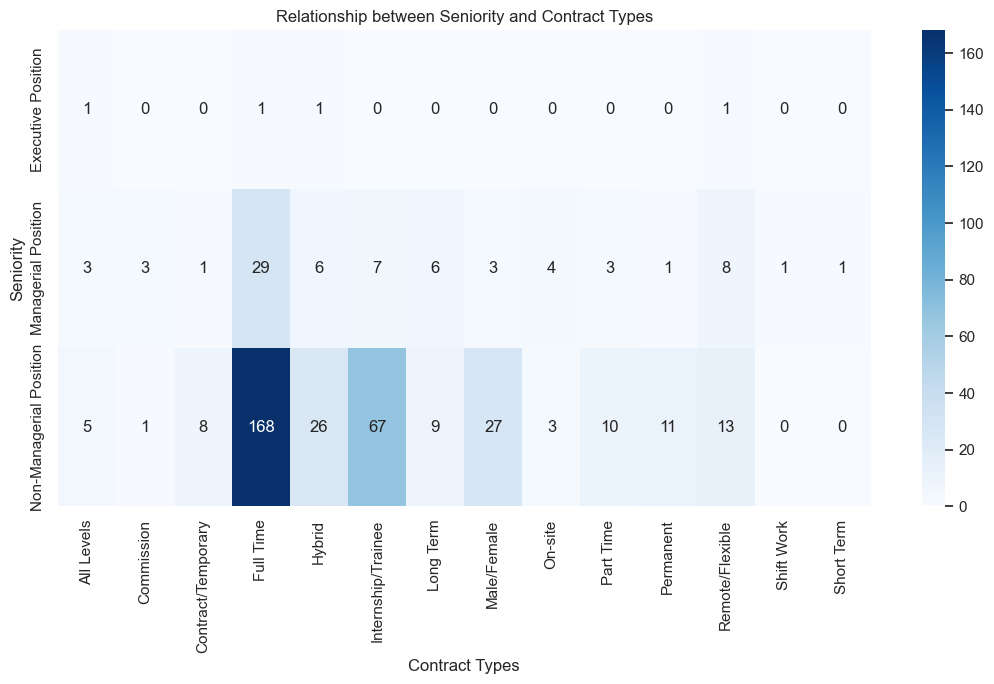

In [71]:
eda_2_df = eda_2_df.explode('Seniority')
eda_2_df = eda_2_df.explode('Contract Types')
relationship_table_eda2 = pd.crosstab(eda_2_df['Seniority'], eda_2_df['Contract Types'])
plt.figure(figsize=(11, 7))
sns.heatmap(relationship_table_eda2, annot=True, fmt='d', cmap='Blues')
plt.title('Relationship between Seniority and Contract Types')
plt.xlabel('Contract Types')
plt.ylabel('Seniority')
plt.tight_layout()
plt.show()

#### Assumption 3 - Meeting Frequency Requirements

As we can see from the heatmap, There are many cells that are empty or have less than 5 observations. Thus, we will be binning certain categories that may be redundant or have low frequencies.

First, we will be combining the **Executive Position** into the **Managerial Position** as there's very many empty cells inside the **Executive Position**.

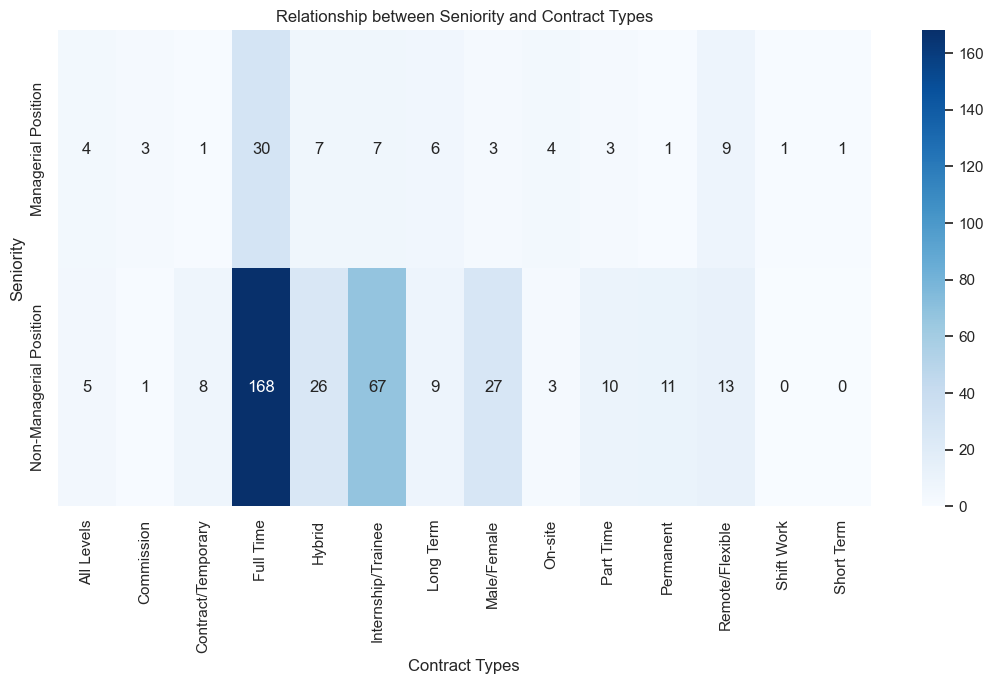

In [72]:
seniority_mapping = {
    'Executive Position': 'Managerial Position',
    'Managerial Position': 'Managerial Position', 
    'Non-Managerial Position': 'Non-Managerial Position'
}

eda_2_df['Seniority'] = eda_2_df['Seniority'].map(seniority_mapping)

eda_2_df = eda_2_df.explode('Seniority')
eda_2_df = eda_2_df.explode('Contract Types')
relationship_table_eda2 = pd.crosstab(eda_2_df['Seniority'], eda_2_df['Contract Types'])
plt.figure(figsize=(11, 7))
sns.heatmap(relationship_table_eda2, annot=True, fmt='d', cmap='Blues')
plt.title('Relationship between Seniority and Contract Types')
plt.xlabel('Contract Types')
plt.ylabel('Seniority')
plt.tight_layout()
plt.show()

Then we may proceed to combine redundant/low frequency contract types to reduce the amount of low frequency cells.

- **Full Time**, **On-Site**, and **Permanent** will be combined to create **Standard Employment**.

- **Part Time**, **Hybrid**, **Remote/Flexible**, and **Shift Work** will be combined to create **Flexible Arrangements**.

- **Contract/Temporary**, **Short Term**, **Long Term**, **Internship/Trainee**, **Commission** will be combined to create **Temporary/Training**.

- **All Levels** and **Male/Female** will be combined to create **Others**.

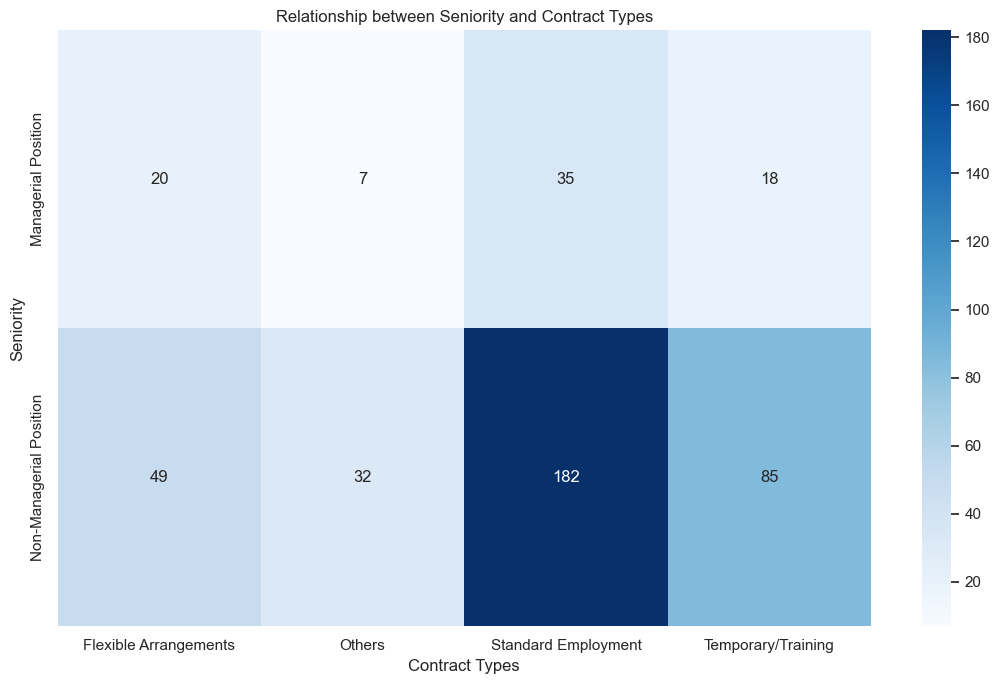

In [73]:
contract_mapping = {
    # Standard employment arrangements
    'Full Time': 'Standard Employment',
    'On-site': 'Standard Employment',
    'Permanent': 'Standard Employment',
    
    # Flexible work arrangements
    'Part Time': 'Flexible Arrangements',
    'Hybrid': 'Flexible Arrangements',
    'Remote/Flexible': 'Flexible Arrangements',
    'Shift Work': 'Flexible Arrangements',
    
    # Temporary and training positions
    'Contract/Temporary': 'Temporary/Training',
    'Short Term': 'Temporary/Training',
    'Long Term': 'Temporary/Training',
    'Internship/Trainee': 'Temporary/Training',
    'Commission': 'Temporary/Training',
    
    # Other categories
    'All Levels': 'Others',
    'Male/Female': 'Others'
}

eda_2_df['Contract Types'] = eda_2_df['Contract Types'].map(contract_mapping)

eda_2_df = eda_2_df.explode('Seniority')
eda_2_df = eda_2_df.explode('Contract Types')
relationship_table_eda2 = pd.crosstab(eda_2_df['Seniority'], eda_2_df['Contract Types'])
plt.figure(figsize=(11, 7))
sns.heatmap(relationship_table_eda2, annot=True, fmt='d', cmap='Blues')
plt.title('Relationship between Seniority and Contract Types')
plt.xlabel('Contract Types')
plt.ylabel('Seniority')
plt.tight_layout()
plt.show()

#### Chi-Square Test of Independence

With all the preprocessing and prerequisite considerations met, we may now proceed with the **Chi-Square Test of Independence** between **Seniority** and **Contract Types**.

In [74]:
# Create a contingency table for the Chi-square test
contingency_table = pd.crosstab(eda_2_df['Seniority'], eda_2_df['Contract Types'])

# Perform Chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Results
print(f"\nChi-square Results:")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Degrees of freedom: {dof}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print(f"Result: SIGNIFICANT (p < {alpha})")
    print("Reject the null hypothesis. There is a significant relationship between seniority and contract type")
else:
    print(f"Result: NOT SIGNIFICANT (p ≥ {alpha})")
    print("Fail to reject the null hypothesis. There is NO significant relationship between seniority and contract type")


Chi-square Results:
Chi-square statistic: 5.8629
p-value: 0.1185
Degrees of freedom: 3
Result: NOT SIGNIFICANT (p ≥ 0.05)
Fail to reject the null hypothesis. There is NO significant relationship between seniority and contract type


#### Interpretation of Results

From the exploratory data analysis question 2, The differences of frequencies in the heatmap did not outright show a significant difference in the types of contracts being given to non-managerial and managerial positions. The results of the formal **Chi-Square Test of Independence** further solidifies the interpretation made from the exploratory data analysis as the test found the variables to have **no statistically significant relationship** with each other.

Although it is important to consider that the amount of job listings among the seniorities significantly vary among each other, with **Non-Managerial Positions** garnering the most entries. The differences in entries may have hindered our ability in detecting a relationship between the variables.

However, the findings of the formal statistical test still suggest that **Seniority presents no association to the type of contracts given among job listings**. 


### Statistical Testing: Locations & Skills

Previously, we explored the relationship between **Locations** and **Skills** from **Keywords** using descriptive statistics to identify meaningful patterns in the data.

To further strengthen our analysis, we will conduct a **Chi-Square Test for Independence** to statistically determine whether there is a significant association between a company’s outsourcing location and the required skill category, with the following hypotheses.

#### Hypotheses

**$H_0$ (null hypothesis):** There is no significant relationship between the outsourcing Location and Skill Category required by companies

**$H_A$ (alternative hypothesis):** There is a significant relationship between the outsourcing Location and Skill Category required by companies

#### Chi-Square Test for Independence between Location and Skill Category

We use the Chi-Square Test for Independence as the statistical test because it is appropriate for analyzing the association between two categorical variables—in this case, Country and Skill Category. This test is justified based on the following assumptions:

- variables are categorical
- observations are independent
- At least 80% of the cells in the contingency table have an expected frequency of 5 or more

#### Assumption 1 - Variables are Categorical

To verify these we will use our previous dataframe `country_skills` from our descriptive analysis for EDA 3. To create a contingency_table

In [75]:
contingency_table = pd.crosstab(country_skills['country'], country_skills['skills'])
contingency_table.head()

skills,Analytics & BI,CMS & Web Platforms,CRM,Cloud Services,Databases,Design Tools,DevOps & CI/CD,ERP & Business Software,Frameworks & Libraries,Hardware,Marketing & Social Media Tools,Methodologies,Networking & Security,Operating Systems,Other and Broader Skills,Programming Languages,Project Management,Tools & Platforms,Tools and Platforms
country,,,,,,,,,,,,,,,,,,,
Argentina,1,1,0,0,0,0,0,2,0,0,5,1,0,0,1,7,0,0,0
Australia,4,6,2,2,0,3,2,21,4,0,14,8,0,1,19,35,0,1,0
Austria,8,0,0,3,1,0,2,40,0,0,0,1,0,0,2,12,10,6,0
Belgium,2,0,3,3,0,9,1,32,2,0,8,5,0,0,24,25,0,6,0
Brazil,95,2,0,39,9,6,16,176,21,3,10,10,9,19,84,187,18,24,2


As seen in the table above, both `country` and `skills` are categorical variables. Where `country` represent the company's outsourcing locations while the `skills` column represents the overall skill categories required in job postings. 

#### Assumption 2 - Observations are Independent

Each cell in the contingency table represents a unique (Country, Skill) pair derived from individual job postings. Since the data was exploded from raw postings and checked for duplicates, we ensure that no (country, skill) pair is double-counted. This supports the assumption that observations are independent.

#### Assumption 3 - Expected Frequencies

At least 80% of the expected frequencies in the contingency table are 5 or more. To verify this, we compute the expected frequencies using the `scipy.stats.chi2_contingency()` function. 

In [76]:
def check_chi2_assumption(contingency_table):
    """
    Performs chi-square test on a contingency table and prints whether 
    Assumption 3 is met: at least 80% of expected frequencies >= 5.
    """
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Convert expected frequencies to DataFrame
    expected_df = pd.DataFrame(expected, 
                               index=contingency_table.index, 
                               columns=contingency_table.columns)

    # Flatten and calculate
    expected_ft = expected_df.values.flatten()
    num_valid = (expected_ft >= 5).sum()
    total_cells = expected_ft.size
    percent_valid = (num_valid / total_cells) * 100

    # Print results
    print(f"Cells with expected frequency ≥ 5: {num_valid} of {total_cells} ({percent_valid:.2f}%)")
    if percent_valid >= 80:
        print("Assumption met: At least 80% of cells have expected frequency ≥ 5.")
    else:
        print("Assumption not met: Less than 80% of cells have expected frequency ≥ 5.")


check_chi2_assumption(contingency_table)

Cells with expected frequency ≥ 5: 307 of 1064 (28.85%)
Assumption not met: Less than 80% of cells have expected frequency ≥ 5.


Since the assumption regarding expected cell frequencies is not met, we need to perform **aggregation** on our data to further generalize the skill categories. This step involves grouping less frequent or related skills into broader categories, reducing sparsity in the contingency table and ensuring that at least 80% of the expected cell counts meet the minimum requirement of 5 or more.

#### Aggregation

We performed aggregation on the skills variable by grouping low-frequency or highly specific skill categories into broader, more general categories. This process reduces the number of sparse entries in the contingency table and increases the cell counts. 

In [77]:
contingency_table.columns.tolist()

['Analytics & BI',
 'CMS & Web Platforms',
 'CRM',
 'Cloud Services',
 'Databases',
 'Design Tools',
 'DevOps & CI/CD',
 'ERP & Business Software',
 'Frameworks & Libraries',
 'Hardware',
 'Marketing & Social Media Tools',
 'Methodologies',
 'Networking & Security',
 'Operating Systems',
 'Other and Broader Skills',
 'Programming Languages',
 'Project Management',
 'Tools & Platforms',
 'Tools and Platforms']

As seen in the list of skills above we can further generalize it into:
- Software Development 
- Data & Infrastructure 
- Design & UX, IT Opertaions 
- Business & Management 
- Other

In [78]:
# Dictionary
dict = {
    # Core Software Development
    'Programming Languages': 'Software Development',
    'Frameworks & Libraries': 'Software Development',
    'DevOps & CI/CD': 'Software Development',
    'Tools & Platforms': 'Software Development',
    'Tools and Platforms': 'Software Development',
    'Cloud Services': 'Software Development',

    # Data & Infrastructure
    'Databases': 'Data & Infrastructure',
    'Analytics & BI': 'Data & Infrastructure',
    'ERP & Business Software': 'Data & Infrastructure',

    # Design & UX
    'Design Tools': 'Design & UX',
    'CMS & Web Platforms': 'Design & UX',

    # IT Operations
    'Operating Systems': 'IT Operations',
    'Networking & Security': 'IT Operations',
    'Hardware': 'IT Operations',

    # Business & Management
    'Project Management': 'Business & Management',
    'CRM': 'Business & Management',
    'Marketing & Social Media Tools': 'Business & Management',

    # Other
    'Other and Broader Skills': 'Other',
    'Methodologies': 'Other'
}

# Apply aggregation directly using the dict
country_skills_aggr = country_skills.copy()
country_skills_aggr['skills'] = country_skills_aggr['skills'].map(dict)

country_skills_aggr = country_skills_aggr.dropna(subset=['skills'])

# Create a contingency table with binned skills
aggr_contingency_table = pd.crosstab(
    country_skills_aggr['country'],
    country_skills_aggr['skills']
)

# Show the resulting contingency table
aggr_contingency_table.head()

skills,Business & Management,Data & Infrastructure,Design & UX,IT Operations,Other,Software Development
country,,,,,,
Argentina,5,3,1,0,2,7
Australia,16,25,9,1,27,44
Austria,10,49,0,0,3,23
Belgium,11,34,9,0,29,37
Brazil,28,280,8,31,94,289


In [79]:
check_chi2_assumption(aggr_contingency_table)

Cells with expected frequency ≥ 5: 173 of 336 (51.49%)
Assumption not met: Less than 80% of cells have expected frequency ≥ 5.


After aggregating the skills into more generalized categories, the percentage of cells with expected frequency ≥ 5 increased to **51.49%** To further improve this, we can apply aggregation to the country variable by grouping countries into regions.

In [80]:
aggr_contingency_table.index.tolist()

['Argentina',
 'Australia',
 'Austria',
 'Belgium',
 'Brazil',
 'Bulgaria',
 'Canada',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Czechia',
 'Denmark',
 'Egypt',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Hungary',
 'India',
 'Indonesia',
 'Ireland',
 'Italy',
 'Japan',
 'Kazakhstan',
 'Lithuania',
 'Malaysia',
 'Mexico',
 'Morocco',
 'Netherlands',
 'New Zealand',
 'Nigeria',
 'Panama',
 'Peru',
 'Philippines',
 'Poland',
 'Portugal',
 'Romania',
 'Serbia',
 'Singapore',
 'Slovakia',
 'Slovenia',
 'South Africa',
 'South Korea',
 'Spain',
 'Sweden',
 'Switzerland',
 'Thailand',
 'Turkey',
 'United Arab Emirates',
 'United Kingdom',
 'United States',
 'Vietnam']

In [81]:
country_region_dict = {
    # Asia
    'China': 'Asia',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Japan': 'Asia',
    'Kazakhstan': 'Asia',
    'Malaysia': 'Asia',
    'Philippines': 'Asia',
    'Singapore': 'Asia',
    'South Korea': 'Asia',
    'Thailand': 'Asia',
    'Vietnam': 'Asia',

    # Europe
    'Austria': 'Europe',
    'Belgium': 'Europe',
    'Bulgaria': 'Europe',
    'Czechia': 'Europe',
    'Denmark': 'Europe',
    'Finland': 'Europe',
    'France': 'Europe',
    'Germany': 'Europe',
    'Greece': 'Europe',
    'Hungary': 'Europe',
    'Ireland': 'Europe',
    'Italy': 'Europe',
    'Lithuania': 'Europe',
    'Netherlands': 'Europe',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Romania': 'Europe',
    'Serbia': 'Europe',
    'Slovakia': 'Europe',
    'Slovenia': 'Europe',
    'Spain': 'Europe',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'United Kingdom': 'Europe',
    'Georgia': 'Europe', 

    # North America
    'Canada': 'North America',
    'Costa Rica': 'North America',
    'Mexico': 'North America',
    'Panama': 'North America',
    'United States': 'North America',

    # South America
    'Argentina': 'South America',
    'Brazil': 'South America',
    'Chile': 'South America',
    'Colombia': 'South America',
    'Peru': 'South America',

    # Africa
    'Chad': 'Africa',
    'Egypt': 'Africa',
    'Ghana': 'Africa',
    'Morocco': 'Africa',
    'Nigeria': 'Africa',
    'South Africa': 'Africa',

    # Oceania
    'Australia': 'Oceania',
    'New Zealand': 'Oceania',

    # Middle East
    'Turkey': 'Middle East',
    'United Arab Emirates': 'Middle East',
}

aggr_contingency_table_region = aggr_contingency_table.copy()
aggr_contingency_table_region['Region'] = aggr_contingency_table_region.index.map(country_region_dict)
aggr_contingency_table_region = aggr_contingency_table_region.dropna(subset=['Region'])

region_contingency_table = aggr_contingency_table_region.groupby('Region').sum()
region_contingency_table

skills,Business & Management,Data & Infrastructure,Design & UX,IT Operations,Other,Software Development
Region,,,,,,
Africa,8,33,4,0,16,47
Asia,124,1116,45,167,463,2346
Europe,586,2027,222,93,1226,2716
Middle East,3,81,4,2,66,77
North America,530,1994,267,203,1225,2313
Oceania,18,27,10,1,32,51
South America,37,304,9,32,96,307


To verify whether our new contingency table—grouping countries by region and generalizing skills—meets the chi-square test assumption that at least 80% of the cells have a frequency of 5 or more, we use our previously defined function `check_chi2_assumption`.

In [82]:
check_chi2_assumption(region_contingency_table)

Cells with expected frequency ≥ 5: 38 of 42 (90.48%)
Assumption met: At least 80% of cells have expected frequency ≥ 5.


Since all three assumptions are met after aggregating our previous contingency table we can proceed in computing the p-value

#### Chi-Square Test for Independence

In [83]:
chi2, p, dof, expected = chi2_contingency(region_contingency_table)

print("Chi-Square Test for Independence")
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p:.4f}")

# Interpretation
print("\nConclusion:")
if p < 0.05:
    print("There is sufficient evidence to reject the null hypothesis.")
    print("We conclude that there is a statistically significant relationship between the outsourcing location (regions) and the skill category required by companies.")
else:
    print("There is insufficient evidence to reject the null hypothesis.")
    print("We conclude that there is no statistically significant relationship between the outsourcing location (regions) and the skill category required by companies.")

Chi-Square Test for Independence
Chi-Square Statistic: 800.4888
Degrees of Freedom: 30
P-value: 0.0000

Conclusion:
There is sufficient evidence to reject the null hypothesis.
We conclude that there is a statistically significant relationship between the outsourcing location (regions) and the skill category required by companies.


#### Interpretation

The test yielded a chi-square statistic of **800.4888** with **30 degrees of freedom** and a p-value of **0.0000**. Using a significance level of **0.05**, the p-value is well below the threshold, indicating strong evidence to **reject the null hypothesis**. Therefore, we conclude that there is a significant relationship between outsourcing location and the type of skills companies require.

## Insights and Conclusions

After completing the various stages of analysis and extracting meaningful insights from the data, we now return to our general research question. The primary objective of this study is to **identify underlying patterns and trends in the international job market**. Specifically, we aim to uncover **factors that influence salary levels** — such as what drives higher or lower pay — and determine whether **certain job fields are associated with specific influencing factors**.


### Recap of the Methods Used in this Dataset

There were several methods involved in analyzing the data from preprprocessing the data to doing the statistical inference.

`Data Preprocessing`:
- Removing unnecesary columns - The group removed the ticker column since it didn't bring any value towards analyzing the data. 
- Removal of duplicated job postings - to ensure every counting is done once only 
- Removal of entries missing critical information - entries with missing Location, Location Data, Contract Types, Seniority, and O*NET Family were removed
- Fixing incorrect datatypes - mainly, the grouped changed date fields of the of the entries to a datetime data type
- Standardizing text field - removal of leading and trailing spaces and converting the entries to lowercase
- Categorizing data to simplify the analysis - Seniority, Job Field (using O*NET Family), Contract Types, Keywords (or skills) were map to various categories which helped in analysis later in the notebook
- Parsed and analyzed location data - the location data column contained json strings, so the group parsed that data for further analysis later in the notebook.
- Salary data extraction and preparation - normalized the currency by using converting to dollars, created an annual salary column using the given lower and upper bounds. 
- Outlier detection - removed the outliers in the annual salary column by calculating the z-score and checking all outliers within a certain range.



`Exploratory Data Analysis`:

**EDA 1 - Salary and Job Fields:**
- Visualization using box plot to compare median salaries, and identify variability and outliers across different job categories.
- Calculation of the median annual salary to avoid skewed results.

**EDA 2 - Seniority and Contract Types (and Salary Relevance)**
- Visualization of the relationship between Seniority and Contract Types via heat map.
- Visualization of the salary distribution among the combinations of seniority and contract types via boxplot.

**EDA 3 - Locations and Skills**
- Merge each country and skills for determining specific skills distributed among each country.
- Visualization of the top country per skills (by skill ration, count >= 250) via barplot.
- Visualization of the top country per skill (by raw count).



`Data Mining`

**Technique**
- This research conducts an association rule mining method to understand whether there are actual associations within the dataset.
- The antecedent and consequent pairs were chosen based on their value, current understanding of the job market, and real life experience via past preconceptions.

**Pre-processing for Data Mining**
- Using the annual salary to get the medium and high salaries by measuring the values within a certain range
- Mapped the seniority positions, contract types, skills and countries inside a new dataframe for further processing later.

**Algorithm Implementation**
- rule_miner.py file contains all the necessary algorithms for finding the support and confidence, merging itemsets, getting rules and frequent itemsets, and finding the association rules.
- Actual rule finding method mainly consists of calling the get_association_rules function inside the RuleMiner class and the comparison of the initial rules set with the association rules found.

`Statistical Inference`

**Job Field and Annual Salary**
- Hypothesis testing by using the mean annual salaries to identify potential patterns.
- One-Way ANOVA Test for finding the differences in mean salaries across all job fields.
- To ensure the validity of the test, this study will analyze and test the independence of observations, the normality of salary across different job fields, and the homogenity of variances.
- In testing the normality, Q-Q plots were used to assess how closely the distribution of the salary data follows a normal distribution. Job fields with insufficient data were also filtered out.
- Levene's test was used in testing the variance to check if the variances are equal across multiple groups.


**Seniority and Contract Types**
- Hypothesis testing targeting the involved categorical variables to check if there is a significant relationship. 
- Chi-Square Test of Independence will be used in finding whether the variables have a significant relationship or are independent.
- To ensure the validity of the test, this study will analyze and test whether the variables are actually categorical, the independence of observations, and frequency requirements.
- To visualize the frequency requirements, a heatmap was used to determine whether the group will be binning certain categories that are redundant or have low frequencies.
- New categories were made out of the combined contract types to reduce low frequency cells.

**Locations & Skills**
- Hypothesis testing between locations and skills to check if there is a significant association between the varaiables.
- Chi-Square Test of Independence will be used in analysis.
- To ensure the validity of this test, this study will analyze and test whether the variables are actually categorical, independence of observations, and frequency requirements
- Aggregation of data and categorizing that data into more general categories to reduce the number of sparse entries in the contingency table.

### Insights and Concluding Statements

Based from the analysis we did from the conducted data mining and statistical inference tests, these are the insights that we have gathered:

#### **Insight #1 – Industry Does Not Guarantee High Salary**
Despite the common belief that entering fields like **Business or Technology guarantees a high-paying job**, our analysis suggests otherwise. We examined well-known industries such as **Tech** and **Business**, which are popularly assumed to offer high salaries. However, the **association rule mining** showed **weak support** for these assumptions. Specifically, the rule **`{Tech} → {Medium Salary}`** only had a **support of 0.0067**, and **`{Business} → {High Salary}`** had a **support of 0.023**, both of which fall **below the 0.6 confidence threshold**.

Furthermore, our **ANOVA test**, which assessed whether job fields significantly differ in terms of salary, revealed that while there is some **variation in average annual salaries** across industries, these differences were **not statistically significant**. This challenges the **simplistic narrative** that choosing a certain industry guarantees higher pay. It opens up the possibility that **salary levels may be shaped by a combination of factors** — such as **job level, location, or years of experience** — rather than industry alone.

---

#### **Insight #2 – Full-Time Work Is Consistent Across Job Hierarchies**
One interesting finding from our analysis is that **working full-time is consistent regardless of one’s job position**, whether **managerial or non-managerial**. While some may assume that managers work fewer hours or have more flexible schedules, our data suggests otherwise.

**Association rule mining** revealed that **non-managerial positions are full-time** with a **support of 0.63**, and **managerial positions** are also mostly full-time with a **support of 0.64**. Both rules passed the **0.6 confidence threshold**, indicating a **strong pattern**.

Additionally, the **Chi-Square Test of Independence** further confirmed that there is **no significant difference in work type (full-time vs part-time)** between job hierarchies. The test showed that **job level and work type are not statistically independent**, reinforcing the idea that **full-time work is prevalent across job levels**. This suggests a relatively **uniform expectation of work hours across hierarchies** in today’s job market.

---

#### **Insight #3 – Tech Skill Demand Is Global, but Location Still Matters**
Our third insight looks at whether **technical skill demand is concentrated in specific countries**, particularly the **USA and India**, which are often seen as global tech hubs. From the **association rule mining**, we attempted to extract rules like **`{USA} → {ERP, Programming Languages}`** and **`{India} → {Frameworks, DevOps}`**, but these rules had **low support values** — **0.28 for USA** and **0.046 for India** — failing to meet the **0.6 confidence threshold**. This indicates that **strong one-to-one associations** between countries and specific tech skills are **not supported by the data**.

However, when we applied the **Chi-Square Test of Independence**, we found a **statistically significant relationship between country and skill demand** (**χ² = 800.49, p-value = 0.000**). This shows that **location still plays a role** in shaping what kinds of **technical skills are in demand**. Even if we cannot extract strong pairwise associations, the overall pattern indicates that **skill demand is not entirely random across countries**.

This insight suggests a **global demand for tech skills**, but with **regional variations in focus or specialization**, possibly due to **educational pipelines, industry presence, or outsourcing trends**. In short, **tech skills are universally valuable**, but **geography influences what’s prioritized where**.




In conclusion, there is no written rule in the international job market. Instead, our analysis just demonstrated a complex and multifacted environment that is frequently challenged by the current data. The only true patterns in the market is that it often defies our assumptions and possibly rewards those who researched deeper rather than checking surface-level trends. 

### Limitations of the Dataset and Possible Future Study Direction


There are several limitations that possibly affects the result of some of the segments in this dataset, mainly the following:

`Lack of Salay Data`
- There are only **305 non-null** annual salaries that was extracted out of **7621 pre-processed entries** from this dataset. This limitation may have had impacts in the analysis, especially in the data mining portion of this study. When the values in EDA were tested for association rule mining, the pairs that have consequents that involved the annual salary (processed within a range) may have been impacted by the limited number of salary data in the overall dataset. A hypothesis of why there are a lot of missing salary data in the dataset is the possibility that these are confidential information that are only discussed during the interview process.

`Dataset is Not Recently Updated`
- The latest values in the dataset contain between the month of January to April 2025 with majority of these values not reaching the double-digits. While not necessarily a big impact towards understanding the produced results from the dataset, there has been a lot of changes in multiple industries this year that was affected by politics and current economic situations. This is caution that there are a lot of differences within the timespan of this dataset to the present date. There has been a lot of layoffs in the tech industry, businesses being affected by economic uncertainties (e.g., Tariffs by the United States), and many more. Any decisions made in guidance with this study should be followed up with more industry research.

In expanding the ideas of this dataset using the latest job postings with the cutoff date ending on August 2025 has the tendency to produce different results in the study, particularly given the rapidly evolving job market conditions such as continued impact of AI integration in various industries, emerging skill requirements, and shifts in employer priorities given the current economic situation. Exploring different pairs for association rule mining can also produce interesting results that this study may have not tackled such as the relationship of skills with seniority levels or salaries for certain contract types. Advanced techniques like natural language processing can be a potential tool for extracting more nuanced requirements. Overall, this study has tackled a significant amount of the job industry trends that will be continued to build upon by other researchers.

## Statement on Generative AI Assistance

During the preparation of this work, the author(s) used **ChatGPT by OpenAI**, **Deepseek by High-Flyer**, and **Claude by Anthropic** for the following purposes:

- To assist in **generating an initial mapping structure** for categorizing data fields such as contract types, job keywords, and job family groupings.
- To help **refactor and streamline code** for consistency and readability across mapping functions.
- To polish the **explanatory text and markdown documentation** used in the notebook.
- To help **generate a dictionary** that categorizes countries by region.


After using this tool, the author(s) **reviewed, validated, and edited all generated content**. In particular, the AI-assisted mapping suggestions were carefully **reviewed and verified by a group member** to ensure the accuracy and consistency of category assignments across the dataset. The author(s) take full responsibility for the final content of the publication.
